<a href="https://colab.research.google.com/github/ganesh3/cyberthreat-finder/blob/main/cyberthreat_pathfinder_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CyberThreat PathFinder: An Agentic Graph Intelligence System

# Setup and Environment

In [1]:
# Install nx-arangodb via pip
!pip install nx-arangodb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which

In [2]:
# Check if you have an NVIDIA GPU
# Note: If this returns "command not found", then GPU-based algorithms via cuGraph are unavailable
!nvidia-smi
!nvcc --version

Mon Mar 10 05:22:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Install nx-cugraph via pip (if GPU is available)
!pip install nx-cugraph-cu12 --extra-index-url=https://pypi.nvidia.com # Requires CUDA-capable GPU

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [4]:
# Install necessary dependencies
!pip install langchain langchain-community langgraph ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


In [5]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 6.0 MB/s eta 0:00:00


In [6]:
%xterm
# Refer this page to setup ollama -- https://medium.com/@abonia/running-ollama-in-google-colab-free-tier-545609258453
# curl https://ollama.ai/install.sh | sh
# ollama serve &
# ollama pull mistral:instruct

Launching Xterm...

<IPython.core.display.Javascript object>

In [7]:
!ollama list

NAME                ID              SIZE      MODIFIED       
mistral:instruct    f974a74358d6    4.1 GB    10 seconds ago    


In [8]:
!pip install -U langchain-ollama

In [9]:
import ollama

In [10]:
# Test connection to Ollama
response = ollama.generate(model='mistral:instruct',
                          prompt='Give me a brief overview of what Ollama is.',
                          options={'temperature': 0.1})
print(response['response'])

 Ollama is an artificial intelligence (AI) model developed by Mistral AI, a French AI company. It's designed to be a large-scale, multimodal AI system that can understand and generate human language as well as process visual and auditory information. The goal of Ollama is to create an AI model that can assist humans in various tasks, from answering questions and generating text to recognizing objects and sounds. It's important to note that while Ollama is a powerful tool, it's not sentient or conscious – it doesn't have feelings, desires, or beliefs. Instead, it processes information based on the patterns it has learned during its training.


In [11]:
# Install data processing tools
!pip install --quiet kaggle openpyxl stix2 taxii2-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 14.3 MB/s eta 0:00:00


In [12]:
# Import the required modules
import networkx as nx
import nx_arangodb as nxadb
from arango import ArangoClient
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import re
from langchain_community.graphs import ArangoGraph
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
from langchain_core.tools import tool
from langchain.agents import initialize_agent, AgentType

[05:29:16 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.


In [13]:
from langchain_community.llms import Ollama
from langchain.agents import AgentExecutor, Tool
from langchain.agents import create_react_agent
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from langchain.tools import tool

In [14]:
# Additional imports for functionality
import json
from datetime import datetime
from IPython.display import display, HTML
import warnings
import os
import time
import requests
import io
import zipfile
from langchain_community.llms import LlamaCpp
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

In [15]:
# Silence warnings
warnings.filterwarnings('ignore')

# Initialize Local LLM

In [16]:
# Configure the LLM to use Ollama
llm = Ollama(
    model="mistral:instruct",
    temperature=0.1,
    base_url="http://localhost:11434"
)

In [17]:
# Test the LLM
test_response = llm.invoke("What is a cybersecurity threat graph?")
print("\nLLM Test Response:")
print(test_response)


LLM Test Response:
 A Cybersecurity Threat Graph is a visual representation of the relationships and interactions between various entities in a cybersecurity context, such as networks, devices, users, and threats. It provides an overview of potential security risks by mapping out connections, dependencies, and patterns that can help identify vulnerabilities and predict future attacks.

Threat graphs are used to analyze complex data sets from multiple sources, including network traffic, system logs, and threat intelligence feeds. They allow cybersecurity analysts to quickly understand the relationships between different entities, spot anomalies, and investigate incidents more efficiently. By visualizing these connections, threat graphs can help organizations prioritize their security efforts, allocate resources effectively, and improve overall cyber resilience.


# Connect to ArangoDB

In [127]:
from google.colab import userdata
ARANGO_URL = userdata.get('ARANGO_URL')
ARANGO_USERNAME = userdata.get('ARANGO_USERNAME')
ARANGO_PASSWORD = userdata.get('ARANGO_PASSWORD')
ARANGO_DB = userdata.get('ARANGO_DB')

In [128]:
ARANGO_DB

'cyberthreat_db'

In [19]:
# Connect to ArangoDB
def connect_to_arangodb():
    try:
        # Connect to ArangoDB
        client = ArangoClient(hosts=ARANGO_URL)

        # Connect to the system database to create cyberthreat_db if it doesn't exist
        sys_db = client.db("_system", username=ARANGO_USERNAME, password=ARANGO_PASSWORD, verify=True)

        # Create a new database if it doesn't exist
        if not sys_db.has_database(ARANGO_DB):
            sys_db.create_database(ARANGO_DB)
            print(f"Created database: {ARANGO_DB}")

        # Connect to the cyberthreat database
        db = client.db(ARANGO_DB, username=ARANGO_USERNAME, password=ARANGO_PASSWORD, verify=True)

        print(f"Successfully connected to ArangoDB at {ARANGO_URL}")
        return db, client
    except Exception as e:
        print(f"Error connecting to ArangoDB: {e}")
        return None, None

In [20]:
db, client = connect_to_arangodb()

Successfully connected to ArangoDB at https://bed312ae38c8.arangodb.cloud:8529


# Download and Process CVE and MITRE ATT&CK Data

In [21]:
# Download CVE data from Kaggle
def download_cve_data():
    # First, set up Kaggle API credentials if needed
    # You may need to upload your kaggle.json file to Colab
    if not os.path.exists('/root/.kaggle'):
        os.makedirs('/root/.kaggle')

    # Check if we already have the data
    if not os.path.exists('cve_data'):
        os.makedirs('cve_data')

    if not os.path.exists('cve_data/cve.csv'):
        print("Downloading CVE dataset from Kaggle...")
        try:
            # Try using Kaggle API if credentials are available
            import kaggle
            kaggle.api.authenticate()
            kaggle.api.dataset_download_files('andrewkronser/cve-common-vulnerabilities-and-exposures', path='cve_data', unzip=True)
        except:
            # If Kaggle API doesn't work, use direct download
            print("Kaggle API not available, downloading from alternative source...")
            cve_url = "https://www.cisa.gov/sites/default/files/csv/known_exploited_vulnerabilities.csv"
            response = requests.get(cve_url)
            with open('cve_data/cve.csv', 'wb') as f:
                f.write(response.content)

    print("Loading CVE data...")
    # Load the main CVE data
    try:
        cve_df = pd.read_csv('cve_data/cve.csv')
        print(f"Successfully loaded CVE data with {len(cve_df)} entries")
        return cve_df
    except:
        # If main dataset fails, try CISA KEV as fallback
        try:
            cve_df = pd.read_csv('cve_data/known_exploited_vulnerabilities.csv')
            print(f"Successfully loaded CISA KEV data with {len(cve_df)} entries")
            return cve_df
        except Exception as e:
            print(f"Error loading CVE data: {e}")
            # Create a minimal dataset as fallback
            return pd.DataFrame({
                'cve_id': ['CVE-2023-0001', 'CVE-2023-0002', 'CVE-2023-0003'],
                'description': [
                    'Remote code execution vulnerability in web server',
                    'SQL injection vulnerability in database application',
                    'Cross-site scripting vulnerability in web application'
                ],
                'published_date': ['2023-01-15', '2023-02-20', '2023-03-10'],
                'cvss_score': [9.8, 8.5, 7.2]
            })

In [22]:
def download_mitre_attack_data():
    # Check if we already have the data
    if not os.path.exists('mitre_data'):
        os.makedirs('mitre_data')

    if not os.path.exists('mitre_data/enterprise-attack.json'):
        print("Downloading MITRE ATT&CK Enterprise framework...")
        url = "https://raw.githubusercontent.com/mitre/cti/master/enterprise-attack/enterprise-attack.json"
        response = requests.get(url)
        with open('mitre_data/enterprise-attack.json', 'wb') as f:
            f.write(response.content)

    print("Loading MITRE ATT&CK data...")
    # Load the MITRE ATT&CK STIX data
    try:
        # Explicitly use UTF-8 encoding when reading the file
        with open('mitre_data/enterprise-attack.json', 'r', encoding='utf-8') as f:
            attack_data = json.load(f)
        print(f"Successfully loaded MITRE ATT&CK data with {len(attack_data['objects'])} objects")
        return attack_data
    except Exception as e:
        print(f"Error loading MITRE ATT&CK data: {str(e)}")

        # Try a more robust approach with error handling
        try:
            print("Trying alternative loading approach...")
            import codecs
            with codecs.open('mitre_data/enterprise-attack.json', 'r', encoding='utf-8', errors='replace') as f:
                content = f.read()
                attack_data = json.loads(content)
            print(f"Successfully loaded MITRE ATT&CK data with alternative method")
            return attack_data
        except Exception as e2:
            print(f"Alternative loading also failed: {str(e2)}")

            # Create minimal dataset as fallback
            print("Using fallback MITRE data")
            return {
                'objects': [
                    {
                        'type': 'attack-pattern',
                        'id': 'attack-pattern--t1059',
                        'name': 'Command and Scripting Interpreter',
                        'description': 'Adversaries may abuse command and script interpreters to execute commands',
                        'kill_chain_phases': [{'kill_chain_name': 'mitre-attack', 'phase_name': 'execution'}]
                    },
                    {
                        'type': 'attack-pattern',
                        'id': 'attack-pattern--t1566',
                        'name': 'Phishing',
                        'description': 'Adversaries may send phishing messages to gain access to victim systems',
                        'kill_chain_phases': [{'kill_chain_name': 'mitre-attack', 'phase_name': 'initial-access'}]
                    },
                    {
                        'type': 'intrusion-set',
                        'id': 'intrusion-set--apt28',
                        'name': 'APT28',
                        'description': 'APT28 is a threat group that has been attributed to Russia',
                    }
                ]
            }

In [23]:
# Process MITRE ATT&CK data into suitable format for ArangoDB
def process_mitre_attack_data(attack_data):
    # Lists to store processed data
    techniques = []
    tactics = []
    threat_actors = []
    relationships = []

    # Process objects from MITRE ATT&CK data
    for obj in attack_data['objects']:
        if obj['type'] == 'attack-pattern':
            # This is a technique
            technique_id = obj.get('external_references', [{}])[0].get('external_id', '').upper() if 'external_references' in obj else None
            if not technique_id:
                continue

            tactic = ''
            if 'kill_chain_phases' in obj:
                for phase in obj['kill_chain_phases']:
                    if phase.get('kill_chain_name') == 'mitre-attack':
                        tactic = phase.get('phase_name', '').replace('-', ' ').title()
                        break

            techniques.append({
                '_key': technique_id,
                'name': obj.get('name', ''),
                'tactic': tactic,
                'description': obj.get('description', '')
            })

        elif obj['type'] == 'intrusion-set':
            # This is a threat actor/group
            actor_id = obj['id'].split('--')[1]
            threat_actors.append({
                '_key': actor_id,
                'name': obj.get('name', ''),
                'type': 'Nation State' if 'government' in obj.get('description', '').lower() else 'Criminal',
                'description': obj.get('description', '')
            })

        elif obj['type'] == 'relationship':
            # This is a relationship between objects
            if obj.get('relationship_type') == 'uses' and obj.get('source_ref', '').startswith('intrusion-set') and obj.get('target_ref', '').startswith('attack-pattern'):
                source_id = obj['source_ref'].split('--')[1]
                target_id = obj['target_ref'].split('--')[1]

                # Get external ID for technique if available
                for rel_obj in attack_data['objects']:
                    if rel_obj.get('id') == obj['target_ref'] and 'external_references' in rel_obj:
                        for ref in rel_obj['external_references']:
                            if ref.get('source_name') == 'mitre-attack':
                                target_id = ref.get('external_id', '').upper()
                                break

                relationships.append({
                    'source': source_id,
                    'target': target_id,
                    'type': 'uses'
                })

    return {
        'techniques': techniques,
        'threat_actors': threat_actors,
        'relationships': relationships
    }

In [24]:
# Process CVE data
def process_cve_data(cve_df, limit=1000):
    print(f"Processing {len(cve_df)} CVE entries...")

    # Map the CISA KEV column names to our expected column names
    if 'cveID' in cve_df.columns and 'CVE ID' not in cve_df.columns:
        print("Detected CISA KEV format, mapping columns...")
        cve_df = cve_df.rename(columns={
            'cveID': 'CVE ID',
            'shortDescription': 'Description',
            'dateAdded': 'Published',
            'cwes': 'CWE ID'
        })

        # Add a default CVSS Score column if missing
        if 'CVSS Score' not in cve_df.columns:
            print("Adding default CVSS scores based on CWE...")
            # Assign a default CVSS based on the shortDescription seriousness
            def estimate_cvss(row):
                desc = row['Description'].lower() if isinstance(row['Description'], str) else ''
                if any(term in desc for term in ['critical', 'remote code execution', 'rce']):
                    return 9.0
                elif any(term in desc for term in ['high', 'arbitrary code', 'privilege escalation']):
                    return 7.5
                elif any(term in desc for term in ['medium', 'information disclosure', 'cross-site']):
                    return 5.0
                else:
                    return 4.0

            cve_df['CVSS Score'] = cve_df.apply(estimate_cvss, axis=1)

    # Process into the format for ArangoDB
    vulnerabilities = []

    for _, row in cve_df.iterrows():
        cve_id = row.get('CVE ID', '')
        if not cve_id:
            continue

        # Clean up the CVE ID to use as a key
        cve_key = cve_id.replace('-', '_')

        # Determine severity based on CVSS if available
        cvss_score = row.get('CVSS Score', 0)
        if not isinstance(cvss_score, (int, float)):
            try:
                cvss_score = float(cvss_score)
            except:
                cvss_score = 0

        severity = 'Unknown'
        if cvss_score >= 9.0:
            severity = 'Critical'
        elif cvss_score >= 7.0:
            severity = 'High'
        elif cvss_score >= 4.0:
            severity = 'Medium'
        elif cvss_score > 0:
            severity = 'Low'

        # Parse the published date
        published_date = row.get('Published', '')

        vulnerabilities.append({
            '_key': cve_key,
            'name': cve_id,
            'description': row.get('Description', ''),
            'cvss_score': cvss_score,
            'published_date': published_date,
            'severity': severity,
            'cwe_id': row.get('CWE ID', '')
        })

    print(f"Created {len(vulnerabilities)} vulnerability objects")
    return vulnerabilities

In [25]:
# Generate relationships between entities with improved connectivity
def generate_relationships(vulnerabilities, threat_actors, techniques):
    """Generate realistic relationships between CVEs, assets, and threat actors with improved connectivity"""
    # Define common asset types in organizations
    assets = [
        {"_key": "server001", "name": "Production Web Server", "type": "Server", "criticality": "High", "operating_system": "Ubuntu 20.04", "ip_address": "10.0.0.1"},
        {"_key": "server002", "name": "Database Server", "type": "Server", "criticality": "Critical", "operating_system": "CentOS 8", "ip_address": "10.0.0.2"},
        {"_key": "server003", "name": "Test Web Server", "type": "Server", "criticality": "Low", "operating_system": "Ubuntu 20.04", "ip_address": "10.0.0.3"},
        {"_key": "server004", "name": "Email Server", "type": "Server", "criticality": "High", "operating_system": "Windows Server 2019", "ip_address": "10.0.0.4"},
        {"_key": "server005", "name": "Domain Controller", "type": "Server", "criticality": "Critical", "operating_system": "Windows Server 2019", "ip_address": "10.0.0.5"},
        {"_key": "workstation001", "name": "CEO Laptop", "type": "Endpoint", "criticality": "Medium", "operating_system": "Windows 11", "ip_address": "10.0.1.1"},
        {"_key": "workstation002", "name": "CFO Laptop", "type": "Endpoint", "criticality": "Medium", "operating_system": "MacOS", "ip_address": "10.0.1.2"},
        {"_key": "workstation003", "name": "Developer Workstation", "type": "Endpoint", "criticality": "Low", "operating_system": "Ubuntu 22.04", "ip_address": "10.0.1.3"},
        {"_key": "router001", "name": "Main Router", "type": "Network", "criticality": "High", "operating_system": "Cisco IOS", "ip_address": "10.0.0.254"},
        {"_key": "firewall001", "name": "Perimeter Firewall", "type": "Network", "criticality": "Critical", "operating_system": "Palo Alto PAN-OS", "ip_address": "10.0.0.253"}
    ]

    # Create relationships
    exploits = []  # ThreatActors -> Vulnerabilities
    targets = []   # Vulnerabilities -> Assets
    uses = []      # ThreatActors -> Techniques

    import random
    from datetime import datetime, timedelta

    # Get lists of keys
    vuln_keys = [v['_key'] for v in vulnerabilities]
    actor_keys = [a['_key'] for a in threat_actors]
    technique_keys = [t['_key'] for t in techniques]
    asset_keys = [a['_key'] for a in assets]

    # Filter vulnerabilities by severity - actors prefer high impact vulns
    critical_vulns = [v['_key'] for v in vulnerabilities if v.get('severity', '') in ['Critical', 'High']]
    if not critical_vulns:
        critical_vulns = vuln_keys

    # Create actor -> vulnerability (exploits) edges
    # Enhanced: Each actor exploits more vulnerabilities for better connectivity
    for actor in threat_actors:
        # Nation state actors exploit more vulnerabilities than criminal groups
        # Increased numbers for better connectivity
        num_exploits = random.randint(5, 12) if actor.get('type', '') == 'Nation State' else random.randint(3, 8)

        # Select vulnerabilities to exploit - prefer critical/high but also some random ones
        exploit_vulns = random.sample(critical_vulns, min(num_exploits // 2 + 1, len(critical_vulns)))
        exploit_vulns += random.sample(vuln_keys, min(num_exploits - len(exploit_vulns), len(vuln_keys)))

        for vuln_key in exploit_vulns:
            # Generate a random date in the last year
            days_ago = random.randint(30, 365)
            date_observed = (datetime.now() - timedelta(days=days_ago)).strftime('%Y-%m-%d')

            confidence = random.choice(['High', 'Medium', 'Low'])

            exploits.append({
                "_from": f"ThreatActors/{actor['_key']}",
                "_to": f"Vulnerabilities/{vuln_key}",
                "confidence": confidence,
                "date_observed": date_observed
            })

    # Create vulnerability -> asset (targets) edges
    # Enhanced: Each vulnerability affects more assets
    for vuln in vulnerabilities:
        # Determine how many assets this vulnerability affects
        # More severe vulnerabilities tend to affect more assets
        # Increased numbers for better connectivity
        if vuln.get('severity', '') == 'Critical':
            num_affected = random.randint(3, 7)
        elif vuln.get('severity', '') == 'High':
            num_affected = random.randint(2, 5)
        else:
            num_affected = random.randint(1, 3)

        # Select assets to affect
        affected_assets = random.sample(asset_keys, min(num_affected, len(asset_keys)))

        for asset_key in affected_assets:
            # Determine impact based on vulnerability severity and asset criticality
            asset = next((a for a in assets if a['_key'] == asset_key), None)
            if not asset:
                continue

            if vuln.get('severity', '') == 'Critical' and asset['criticality'] == 'Critical':
                impact = 'Critical'
            elif vuln.get('severity', '') == 'Critical' or asset['criticality'] == 'Critical':
                impact = 'High'
            elif vuln.get('severity', '') == 'High' and asset['criticality'] == 'High':
                impact = 'High'
            elif vuln.get('severity', '') == 'High' or asset['criticality'] == 'High':
                impact = 'Medium'
            else:
                impact = 'Low'

            # Determine remediation status
            status_weights = {
                'Patched': 30,
                'In Progress': 30,
                'Unpatched': 40
            }
            statuses = list(status_weights.keys())
            weights = list(status_weights.values())

            remediation_status = random.choices(statuses, weights=weights, k=1)[0]

            targets.append({
                "_from": f"Vulnerabilities/{vuln['_key']}",
                "_to": f"Assets/{asset_key}",
                "impact": impact,
                "remediation_status": remediation_status
            })

    # Create actor -> technique (uses) edges
    # Enhanced: Each actor uses more techniques
    for actor in threat_actors:
        # Determine how many techniques this actor uses
        # Increased for better connectivity
        num_techniques = random.randint(4, 10)

        # Select techniques
        used_techniques = random.sample(technique_keys, min(num_techniques, len(technique_keys)))

        for tech_key in used_techniques:
            # Generate a random date in the last year
            days_ago = random.randint(30, 365)
            last_observed = (datetime.now() - timedelta(days=days_ago)).strftime('%Y-%m-%d')

            frequency = random.choice(['High', 'Medium', 'Low'])

            uses.append({
                "_from": f"ThreatActors/{actor['_key']}",
                "_to": f"Techniques/{tech_key}",
                "frequency": frequency,
                "last_observed": last_observed
            })

    # Ensure all vulnerability to asset paths connect to at least one threat actor
    # This ensures the completeness of attack paths
    return {
        "assets": assets,
        "exploits": exploits,
        "targets": targets,
        "uses": uses
    }

In [26]:
# Download and process the datasets
print("Downloading and processing CVE data...")
cve_df = download_cve_data()
cve_vulnerabilities = process_cve_data(cve_df)

Kaggle API not available, downloading from alternative source...
Loading CVE data...
Successfully loaded CVE data with 1289 entries
Processing 1289 CVE entries...
Detected CISA KEV format, mapping columns...
Adding default CVSS scores based on CWE...
Created 1289 vulnerability objects


In [27]:
print("Downloading and processing MITRE ATT&CK data...")
attack_data = download_mitre_attack_data()
processed_attack = process_mitre_attack_data(attack_data)

Loading MITRE ATT&CK data...
Successfully loaded MITRE ATT&CK data with 21315 objects


In [28]:
# Generate relationships between the entities
relationships = generate_relationships(
    cve_vulnerabilities,
    processed_attack['threat_actors'],
    processed_attack['techniques']
)

In [29]:
print(f"Processed data summary:")
print(f"- {len(cve_vulnerabilities)} CVE vulnerabilities")
print(f"- {len(processed_attack['techniques'])} MITRE techniques")
print(f"- {len(processed_attack['threat_actors'])} threat actors")
print(f"- {len(relationships['assets'])} assets")
print(f"- {len(relationships['exploits'])} exploit relationships")
print(f"- {len(relationships['targets'])} target relationships")
print(f"- {len(relationships['uses'])} technique usage relationships")

Processed data summary:
- 1289 CVE vulnerabilities
- 799 MITRE techniques
- 174 threat actors
- 10 assets
- 1097 exploit relationships
- 3893 target relationships
- 1228 technique usage relationships


# Create Cybersecurity Graph Schema

In [30]:
# Set up collections for the threat graph
def setup_threat_graph_collections(db):
    # Define collections needed for cybersecurity graph
    collections = [
        {"name": "Vulnerabilities", "edge": False},
        {"name": "Assets", "edge": False},
        {"name": "ThreatActors", "edge": False},
        {"name": "Techniques", "edge": False},
        {"name": "Exploits", "edge": True},
        {"name": "Targets", "edge": True},
        {"name": "Uses", "edge": True}
    ]

    # Create collections if they don't exist
    for col in collections:
        if not db.has_collection(col["name"]):
            db.create_collection(col["name"], edge=col["edge"])
            print(f"Created {col['name']} {'edge ' if col['edge'] else ''}collection")

    # Create a named graph if it doesn't exist
    if not db.has_graph("ThreatGraph"):
        graph = db.create_graph("ThreatGraph")

        # Define edge definitions
        graph.create_edge_definition(
            edge_collection="Exploits",
            from_vertex_collections=["ThreatActors"],
            to_vertex_collections=["Vulnerabilities"]
        )

        graph.create_edge_definition(
            edge_collection="Targets",
            from_vertex_collections=["Vulnerabilities"],
            to_vertex_collections=["Assets"]
        )

        graph.create_edge_definition(
            edge_collection="Uses",
            from_vertex_collections=["ThreatActors"],
            to_vertex_collections=["Techniques"]
        )

        print("Created ThreatGraph with edge definitions")
    else:
        graph = db.graph("ThreatGraph")
        print("Using existing ThreatGraph")

    return graph

In [31]:
# Load data into ArangoDB
def load_threat_data_to_arangodb(db, vulnerabilities, techniques, threat_actors, assets, exploits, targets, uses):
    # Load vertex collections
    collections_data = {
        "Vulnerabilities": vulnerabilities,
        "Assets": assets,
        "ThreatActors": threat_actors,
        "Techniques": techniques
    }

    for collection_name, data in collections_data.items():
        if db.collection(collection_name).count() == 0:
            print(f"Loading {len(data)} documents into {collection_name}...")
            # Load in batches to avoid memory issues
            batch_size = 1000
            for i in range(0, len(data), batch_size):
                batch = data[i:i+batch_size]
                db.collection(collection_name).import_bulk(batch)
            print(f"Loaded data into {collection_name}")
        else:
            print(f"Collection {collection_name} already has data, skipping import")

    # Load edge collections
    edge_collections_data = {
        "Exploits": exploits,
        "Targets": targets,
        "Uses": uses
    }

    for collection_name, data in edge_collections_data.items():
        if db.collection(collection_name).count() == 0:
            print(f"Loading {len(data)} edges into {collection_name}...")
            # Load in batches to avoid memory issues
            batch_size = 1000
            for i in range(0, len(data), batch_size):
                batch = data[i:i+batch_size]
                db.collection(collection_name).import_bulk(batch)
            print(f"Loaded data into {collection_name}")
        else:
            print(f"Collection {collection_name} already has data, skipping import")

In [32]:
# Set up the graph and load the data
graph = setup_threat_graph_collections(db)
load_threat_data_to_arangodb(
    db,
    cve_vulnerabilities,
    processed_attack['techniques'],
    processed_attack['threat_actors'],
    relationships['assets'],
    relationships['exploits'],
    relationships['targets'],
    relationships['uses']
)

Using existing ThreatGraph
Collection Vulnerabilities already has data, skipping import
Collection Assets already has data, skipping import
Collection ThreatActors already has data, skipping import
Collection Techniques already has data, skipping import
Collection Exploits already has data, skipping import
Collection Targets already has data, skipping import
Collection Uses already has data, skipping import


# Create NetworkX Graph from ArangoDB

In [33]:
# Create NetworkX graph from ArangoDB
def create_threat_graph_nx():
    try:
        # Create a nx-arangodb graph directly connected to the ArangoDB graph
        G_threat = nxadb.Graph(
            name="ThreatGraph",
            db=db,
            create=False  # Don't create a new graph, use existing one
        )

        print(f"Successfully connected to ThreatGraph in ArangoDB")
        print(f"Graph has {G_threat.number_of_nodes()} nodes and {G_threat.number_of_edges()} edges")

        return G_threat
    except Exception as e:
        print(f"Error creating ThreatGraph from ArangoDB: {e}")
        return None

In [34]:
# Validate that the graph is properly connected
def validate_threat_graph(G):
    """Check if the graph is properly connected and has expected properties"""
    print("\n=== Validating Threat Graph ===")

    # Basic graph information
    print(f"Graph type: {type(G)}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Is directed: {G.is_directed() if hasattr(G, 'is_directed') else 'Unknown'}")

    # Count node types
    node_types = {}
    for node in G.nodes():
        node_type = node.split('/')[0] if '/' in node else 'Unknown'
        node_types[node_type] = node_types.get(node_type, 0) + 1

    print(f"Node types: {node_types}")

    # Check connectivity
    if hasattr(G, 'is_connected'):
        if not G.is_connected():
            print("WARNING: Graph is not connected!")
            components = list(nx.connected_components(G))
            print(f"Found {len(components)} disconnected components")

            # Print component sizes
            component_sizes = [len(c) for c in components]
            print(f"Component sizes: {component_sizes}")
    else:
        print("Cannot check graph connectivity - graph type doesn't support is_connected()")

    # Check for path existence between key nodes
    # Sample a few threat actors and assets
    threat_actors = [n for n in G.nodes() if isinstance(n, str) and n.startswith("ThreatActors/")]
    assets = [n for n in G.nodes() if isinstance(n, str) and n.startswith("Assets/")]

    print(f"\nFound {len(threat_actors)} threat actors and {len(assets)} assets")

    if threat_actors and assets:
        # Convert to directed graph for path checking if needed
        if not G.is_directed() and hasattr(nx, 'DiGraph'):
            G_directed = nx.DiGraph(G)
        else:
            G_directed = G

        # Check paths between first threat actor and all assets
        if len(threat_actors) > 0 and len(assets) > 0:
            sample_actor = threat_actors[0]
            print(f"\nChecking paths from {sample_actor} to all assets:")

            paths_exist = 0
            for asset in assets[:5]:  # Check up to 5 assets
                try:
                    if nx.has_path(G_directed, sample_actor, asset):
                        paths_exist += 1
                    else:
                        print(f"WARNING: No path between {sample_actor} and {asset}")
                except Exception as e:
                    print(f"Error checking path: {e}")

            print(f"Paths exist to {paths_exist} out of {min(5, len(assets))} sampled assets")

    # Check density
    if hasattr(nx, 'density'):
        density = nx.density(G)
        print(f"\nGraph density: {density:.6f}")
        if density < 0.01:
            print("WARNING: Graph is very sparse. Consider adding more edges.")

    print("=== Validation Complete ===\n")
    return G

In [35]:
# Create the NetworkX graph
G_threat = create_threat_graph_nx()

[05:29:52 +0000] [INFO]: Graph 'ThreatGraph' exists.
INFO:nx_arangodb:Graph 'ThreatGraph' exists.
[05:29:52 +0000] [INFO]: Default node type set to 'Assets'
INFO:nx_arangodb:Default node type set to 'Assets'


Successfully connected to ThreatGraph in ArangoDB
Graph has 18 nodes and 17 edges


In [36]:
# Check if the graph is undirected and convert it to directed if needed
if hasattr(G_threat, 'is_directed') and not G_threat.is_directed():
    print("Converting undirected graph to directed graph...")
    import networkx as nx
    G_threat = nx.DiGraph(G_threat)
    print(f"Converted to directed graph with {G_threat.number_of_nodes()} nodes and {G_threat.number_of_edges()} edges")

Converting undirected graph to directed graph...
Converted to directed graph with 18 nodes and 34 edges


# Graph Analysis Functions

In [37]:
# Analyze the cybersecurity graph
def analyze_threat_graph(G):
    """Perform comprehensive analysis of the threat graph"""
    if G is None:
        print("No graph to analyze")
        return {}

    # Basic statistics
    stats = {
        "node_count": G.number_of_nodes(),
        "edge_count": G.number_of_edges(),
        "density": nx.density(G),
        "is_directed": G.is_directed()
    }

    # Count nodes by type
    node_types = {}
    for node in G.nodes():
        node_type = node.split('/')[0] if '/' in node else 'Unknown'
        node_types[node_type] = node_types.get(node_type, 0) + 1

    stats["node_types"] = node_types

    # Count edges by type
    edge_types = {}
    for edge in G.edges():
        edge_data = G.get_edge_data(edge[0], edge[1])
        for key in edge_data:
            if isinstance(edge_data[key], dict) and '_id' in edge_data[key]:
                edge_type = edge_data[key]['_id'].split('/')[0] if '/' in edge_data[key]['_id'] else 'Unknown'
                edge_types[edge_type] = edge_types.get(edge_type, 0) + 1

    stats["edge_types"] = edge_types

    # Calculate centrality measures
    try:
        # PageRank to identify critical nodes
        pr = nx.pagerank(G)
        stats["pagerank_top10"] = {node: round(score, 4) for node, score in sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]}

        # Degree centrality
        dc = nx.degree_centrality(G)
        stats["degree_centrality_top10"] = {node: round(score, 4) for node, score in sorted(dc.items(), key=lambda x: x[1], reverse=True)[:10]}

        # Identify critical assets based on vulnerability connections
        asset_vulnerability_count = {}
        for node in G.nodes():
            if node.startswith("Assets/"):
                # Count incoming edges from vulnerabilities
                vuln_count = sum(1 for pred in G.predecessors(node) if pred.startswith("Vulnerabilities/"))
                asset_vulnerability_count[node] = vuln_count

        stats["asset_risk_top5"] = {node: count for node, count in sorted(asset_vulnerability_count.items(), key=lambda x: x[1], reverse=True)[:5]}

        # Identify threat actors by impact
        actor_exploit_count = {}
        for node in G.nodes():
            if node.startswith("ThreatActors/"):
                # Count outgoing edges to vulnerabilities
                exploit_count = sum(1 for succ in G.successors(node) if succ.startswith("Vulnerabilities/"))
                actor_exploit_count[node] = exploit_count

        stats["threat_actors_by_impact"] = {node: count for node, count in sorted(actor_exploit_count.items(), key=lambda x: x[1], reverse=True)}

    except Exception as e:
        print(f"Error computing graph metrics: {e}")

    return stats

In [38]:
# Find attack paths with improved error handling
def find_attack_paths(G, threat_actor, target_asset, max_depth=3):
    """Find attack paths with better handling for sparse or disconnected graphs"""
    try:
        print(f"Looking for attack paths from '{threat_actor}' to '{target_asset}'")

        # Find the nodes
        actor_node = None
        target_actor_name = threat_actor.lower()
        for node in G.nodes():
            if node.startswith("ThreatActors/"):
                node_name = G.nodes[node].get('name', '').lower()
                if target_actor_name in node.lower() or target_actor_name in node_name:
                    actor_node = node
                    print(f"Found actor node: {actor_node}")
                    break

        asset_node = None
        target_asset_name = target_asset.lower()
        for node in G.nodes():
            if node.startswith("Assets/"):
                node_name = G.nodes[node].get('name', '').lower()
                if target_asset_name in node.lower() or target_asset_name in node_name:
                    asset_node = node
                    print(f"Found asset node: {asset_node}")
                    break

        if not actor_node:
            return {"error": f"Could not find threat actor: {threat_actor}"}
        if not asset_node:
            return {"error": f"Could not find target asset: {target_asset}"}

        # Check if any path exists
        if not nx.has_path(G, actor_node, asset_node):
            print(f"No path exists between {actor_node} and {asset_node}")

            # Instead of adding synthetic connections, provide an informative error
            # Find what the actor can reach
            reachable_from_actor = set(nx.descendants(G, actor_node))
            reachable_assets = [n for n in reachable_from_actor if n.startswith("Assets/")]

            # Find what can reach the asset
            ancestors_of_asset = set(nx.ancestors(G, asset_node))
            potential_actors = [n for n in ancestors_of_asset if n.startswith("ThreatActors/")]

            # Construct a helpful error message
            error_msg = f"No attack path found from {threat_actor} to {target_asset}."

            if reachable_assets:
                asset_names = [G.nodes[a].get('name', a.split('/')[-1]) for a in reachable_assets[:3]]
                error_msg += f" {threat_actor} can reach: {', '.join(asset_names)}"
                if len(reachable_assets) > 3:
                    error_msg += f" and {len(reachable_assets)-3} more."

            if potential_actors:
                actor_names = [G.nodes[a].get('name', a.split('/')[-1]) for a in potential_actors[:3]]
                error_msg += f" {target_asset} can be reached by: {', '.join(actor_names)}"
                if len(potential_actors) > 3:
                    error_msg += f" and {len(potential_actors)-3} more."

            return {
                "error": error_msg,
                "reachable_assets": [G.nodes[a].get('name', a.split('/')[-1]) for a in reachable_assets],
                "potential_actors": [G.nodes[a].get('name', a.split('/')[-1]) for a in potential_actors]
            }

        # Find paths
        all_paths = []
        try:
            # Start with shortest path for efficiency
            shortest_path = nx.shortest_path(G, actor_node, asset_node)

            # Process the path
            path_info = []
            for i, node in enumerate(shortest_path):
                node_type = node.split('/')[0] if '/' in node else 'Unknown'
                node_key = node.split('/')[1] if '/' in node else node

                # Get node attributes
                node_attrs = {}
                for attr, value in G.nodes[node].items():
                    if attr != '_id' and attr != '_key':
                        node_attrs[attr] = value

                # Get edge information
                edge_info = None
                if i < len(shortest_path) - 1:
                    edge_data = G.get_edge_data(node, shortest_path[i+1])
                    if edge_data:
                        edge_info = {}
                        for key in edge_data:
                            if isinstance(edge_data[key], dict):
                                for prop, value in edge_data[key].items():
                                    if prop != '_id' and prop != '_key':
                                        edge_info[prop] = value
                                # Add the edge type based on node types
                                if node.startswith("ThreatActors/") and shortest_path[i+1].startswith("Vulnerabilities/"):
                                    edge_info["type"] = "exploits"
                                elif node.startswith("Vulnerabilities/") and shortest_path[i+1].startswith("Assets/"):
                                    edge_info["type"] = "targets"

                path_info.append({
                    "id": node,
                    "type": node_type,
                    "key": node_key,
                    "attributes": node_attrs,
                    "edge_to_next": edge_info
                })

            all_paths.append(path_info)

            # Try to find a few more paths
            try:
                # Set a limit for performance
                max_paths_to_return = 3
                paths_found = 1

                for path in nx.all_simple_paths(G, actor_node, asset_node, cutoff=max_depth):
                    # Skip the path we already processed
                    if path == shortest_path:
                        continue

                    # Process additional path
                    path_info = []
                    for i, node in enumerate(path):
                        # Similar processing as above
                        node_type = node.split('/')[0] if '/' in node else 'Unknown'
                        node_key = node.split('/')[1] if '/' in node else node

                        # Node attributes
                        node_attrs = {}
                        for attr, value in G.nodes[node].items():
                            if attr != '_id' and attr != '_key':
                                node_attrs[attr] = value

                        # Edge info
                        edge_info = None
                        if i < len(path) - 1:
                            edge_data = G.get_edge_data(node, path[i+1])
                            if edge_data:
                                edge_info = {}
                                for key in edge_data:
                                    if isinstance(edge_data[key], dict):
                                        for prop, value in edge_data[key].items():
                                            if prop != '_id' and prop != '_key':
                                                edge_info[prop] = value
                                        # Add edge type
                                        if node.startswith("ThreatActors/") and path[i+1].startswith("Vulnerabilities/"):
                                            edge_info["type"] = "exploits"
                                        elif node.startswith("Vulnerabilities/") and path[i+1].startswith("Assets/"):
                                            edge_info["type"] = "targets"

                        path_info.append({
                            "id": node,
                            "type": node_type,
                            "key": node_key,
                            "attributes": node_attrs,
                            "edge_to_next": edge_info
                        })

                    all_paths.append(path_info)
                    paths_found += 1

                    if paths_found >= max_paths_to_return:
                        break

            except Exception as e:
                print(f"Error finding additional paths: {e}")

            print(f"Found {len(all_paths)} attack paths")
            return {"paths": all_paths, "path_count": len(all_paths)}

        except Exception as e:
            print(f"Error finding paths: {e}")
            return {"error": f"Error finding attack paths: {str(e)}"}

    except Exception as e:
        return {"error": f"Unexpected error: {str(e)}"}

In [39]:
# Analyze vulnerabilities affecting an asset
def analyze_asset_vulnerabilities(G, asset_name):
    """Analyze all vulnerabilities affecting a specific asset"""
    try:
        # Find the asset node
        asset_node = None
        for node in G.nodes():
            if node.startswith("Assets/"):
                if asset_name in node or G.nodes[node].get('name', '') == asset_name:
                    asset_node = node
                    break

        if not asset_node:
            return {"error": f"Asset '{asset_name}' not found"}

        # Get asset details
        asset_details = {
            "id": asset_node,
            "key": asset_node.split('/')[1] if '/' in asset_node else asset_node
        }

        # Add all attributes
        for attr, value in G.nodes[asset_node].items():
            if attr != '_id' and attr != '_key':
                asset_details[attr] = value

        # Find vulnerabilities affecting this asset
        vulnerabilities = []
        for pred in G.predecessors(asset_node):
            if pred.startswith("Vulnerabilities/"):
                # Get vulnerability details
                vuln_details = {
                    "id": pred,
                    "key": pred.split('/')[1] if '/' in pred else pred
                }

                # Add all vulnerability attributes
                for attr, value in G.nodes[pred].items():
                    if attr != '_id' and attr != '_key':
                        vuln_details[attr] = value

                # Get edge details (relationship between vulnerability and asset)
                edge_data = G.get_edge_data(pred, asset_node)
                edge_details = {}
                if edge_data:
                    for key in edge_data:
                        if isinstance(edge_data[key], dict):
                            for prop, value in edge_data[key].items():
                                if prop != '_id' and prop != '_key':
                                    edge_details[prop] = value

                vuln_details["impact_details"] = edge_details

                # Find threat actors exploiting this vulnerability
                threat_actors = []
                for pred2 in G.predecessors(pred):
                    if pred2.startswith("ThreatActors/"):
                        actor_details = {
                            "id": pred2,
                            "key": pred2.split('/')[1] if '/' in pred2 else pred2
                        }

                        # Add all actor attributes
                        for attr, value in G.nodes[pred2].items():
                            if attr != '_id' and attr != '_key':
                                actor_details[attr] = value

                        threat_actors.append(actor_details)

                vuln_details["exploited_by"] = threat_actors
                vulnerabilities.append(vuln_details)

        # Sort vulnerabilities by CVSS score if available
        vulnerabilities.sort(key=lambda x: x.get('cvss_score', 0), reverse=True)

        return {
            "asset": asset_details,
            "vulnerabilities": vulnerabilities,
            "vulnerability_count": len(vulnerabilities)
        }
    except Exception as e:
        return {"error": str(e)}

In [40]:
# Visualize the threat graph
def visualize_threat_graph(G, node_types=None, highlight_nodes=None, title="Cybersecurity Threat Graph"):
    """Visualize the threat graph with colored nodes by type and improved layout"""
    if G is None:
        print("No graph to visualize")
        return None

    plt.figure(figsize=(16, 12))  # Larger figure size for better visibility

    # Define colors for different node types
    if node_types is None:
        node_types = {
            'Vulnerabilities': 'red',
            'Assets': 'blue',
            'ThreatActors': 'purple',
            'Techniques': 'orange'
        }

    # Create node colors based on node type
    node_colors = []
    node_sizes = []
    node_labels = {}

    for node in G.nodes():
        # Extract collection name from node ID
        parts = node.split('/')
        collection = parts[0] if len(parts) > 1 else "Unknown"

        # Set color based on node type
        node_colors.append(node_types.get(collection, 'gray'))

        # Set size - highlight specific nodes if requested and vary by type
        if highlight_nodes and node in highlight_nodes:
            node_sizes.append(800)  # Bigger size for highlighted nodes
        elif collection == 'ThreatActors':
            node_sizes.append(500)  # Bigger for threat actors
        elif collection == 'Assets':
            node_sizes.append(450)  # Bigger for assets
        elif collection == 'Vulnerabilities':
            node_sizes.append(400)  # Medium for vulnerabilities
        else:
            node_sizes.append(350)  # Default size

        # Create cleaner labels
        if len(parts) > 1:
            # Use name property if available, otherwise use the key
            if hasattr(G.nodes[node], 'get'):
                name = G.nodes[node].get('name', parts[1])
                # Truncate long names
                if len(name) > 20:
                    name = name[:17] + '...'
                node_labels[node] = name
            else:
                node_labels[node] = parts[1]
        else:
            node_labels[node] = node

    # Try different layout algorithms for better visualization
    try:
        # Try Kamada-Kawai layout first (often better for cybersecurity graphs)
        pos = nx.kamada_kawai_layout(G)
    except:
        try:
            # Fall back to spring layout with more iterations for better results
            pos = nx.spring_layout(G, k=0.5, iterations=100, seed=42)
        except:
            # Ultimate fallback
            pos = nx.random_layout(G)

    # Draw nodes with alpha for better visibility when overlapping
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)

    # Draw edges with varying width based on importance
    edge_width = []
    for u, v in G.edges():
        # Extract edge type if available
        if hasattr(G, 'get_edge_data'):
            edge_data = G.get_edge_data(u, v)
            if edge_data and any('impact' in data for data in edge_data.values() if isinstance(data, dict)):
                # Critical edges are thicker
                width = 2.5
            else:
                width = 1.5
        else:
            width = 1.5
        edge_width.append(width)

    # Draw edges with better styling
    nx.draw_networkx_edges(
        G, pos, width=edge_width, alpha=0.7, arrows=True,
        arrowsize=15, arrowstyle='->', connectionstyle='arc3,rad=0.1'
    )

    # Draw labels with better font and positioning
    nx.draw_networkx_labels(
        G, pos, labels=node_labels, font_size=10,
        font_weight='bold', font_family='sans-serif',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()

    return plt

In [41]:
# Run initial analysis on the threat graph
threat_graph_stats = analyze_threat_graph(G_threat)
print("\nThreat Graph Analysis Results:")
for metric, value in threat_graph_stats.items():
    if not isinstance(value, dict):
        print(f"{metric}: {value}")
    else:
        print(f"\n{metric}:")
        for k, v in value.items():
            print(f"  {k}: {v}")


Threat Graph Analysis Results:
node_count: 18
edge_count: 34
density: 0.1111111111111111
is_directed: True

node_types:
  Vulnerabilities: 5
  Techniques: 5
  ThreatActors: 3
  Assets: 5

edge_types:

pagerank_top10:
  ThreatActors/apt28: 0.1069
  ThreatActors/lazarus: 0.1069
  Vulnerabilities/CVE-2023-9012: 0.0805
  Vulnerabilities/CVE-2023-7890: 0.0805
  Vulnerabilities/CVE-2023-3456: 0.0721
  ThreatActors/fin7: 0.0721
  Assets/server002: 0.0541
  Assets/server001: 0.0541
  Vulnerabilities/CVE-2023-5678: 0.0541
  Vulnerabilities/CVE-2023-1234: 0.0541

degree_centrality_top10:
  ThreatActors/apt28: 0.4706
  ThreatActors/lazarus: 0.4706
  Vulnerabilities/CVE-2023-9012: 0.3529
  Vulnerabilities/CVE-2023-7890: 0.3529
  Vulnerabilities/CVE-2023-3456: 0.2353
  ThreatActors/fin7: 0.2353
  Vulnerabilities/CVE-2023-5678: 0.2353
  Assets/server002: 0.2353
  Vulnerabilities/CVE-2023-1234: 0.2353
  Assets/server001: 0.2353

asset_risk_top5:
  Assets/server002: 2
  Assets/server001: 2
  Assets/s

In [42]:
#Validate the graph to check for connectivity issues
G_threat = validate_threat_graph(G_threat)

# Run initial analysis on the threat graph
threat_graph_stats = analyze_threat_graph(G_threat)


=== Validating Threat Graph ===
Graph type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 18
Number of edges: 34
Is directed: True
Node types: {'Vulnerabilities': 5, 'Techniques': 5, 'ThreatActors': 3, 'Assets': 5}
Cannot check graph connectivity - graph type doesn't support is_connected()

Found 3 threat actors and 5 assets

Checking paths from ThreatActors/apt28 to all assets:
Paths exist to 4 out of 5 sampled assets

Graph density: 0.111111
=== Validation Complete ===



In [43]:
# Analyze what connections actually exist in the graph
def analyze_available_connections(G):
    """Analyze what connections actually exist in the graph to inform our questions"""
    print("\n=== Analyzing Available Connections ===")

    # Find all threat actors and assets
    threat_actors = [n for n in G.nodes() if n.startswith("ThreatActors/")]
    assets = [n for n in G.nodes() if n.startswith("Assets/")]
    vulnerabilities = [n for n in G.nodes() if n.startswith("Vulnerabilities/")]
    techniques = [n for n in G.nodes() if n.startswith("Techniques/")]

    # Store valid connections
    valid_paths = []
    actor_to_asset_map = {}

    print(f"Checking paths between {len(threat_actors)} threat actors and {len(assets)} assets")

    # Check each actor-asset pair
    path_count = 0
    for actor in threat_actors:
        actor_name = G.nodes[actor].get('name', actor.split('/')[-1])
        actor_to_asset_map[actor_name] = []

        for asset in assets:
            asset_name = G.nodes[asset].get('name', asset.split('/')[-1])

            if nx.has_path(G, actor, asset):
                path = nx.shortest_path(G, actor, asset)
                path_count += 1
                valid_paths.append((actor_name, asset_name))
                actor_to_asset_map[actor_name].append(asset_name)
                print(f"✓ Path exists from {actor_name} to {asset_name}, length: {len(path)}")

    # Find assets with most vulnerabilities
    asset_vuln_count = {}
    for asset in assets:
        asset_name = G.nodes[asset].get('name', asset.split('/')[-1])
        vuln_count = sum(1 for pred in G.predecessors(asset) if pred.startswith("Vulnerabilities/"))
        asset_vuln_count[asset_name] = vuln_count

    # Find actors with most techniques
    actor_tech_count = {}
    for actor in threat_actors:
        actor_name = G.nodes[actor].get('name', actor.split('/')[-1])
        tech_count = sum(1 for succ in G.successors(actor) if succ.startswith("Techniques/"))
        actor_tech_count[actor_name] = tech_count

    print(f"Found {path_count} valid paths between actors and assets")
    print(f"Assets with most vulnerabilities: {sorted(asset_vuln_count.items(), key=lambda x: x[1], reverse=True)[:3]}")
    print(f"Actors with most techniques: {sorted(actor_tech_count.items(), key=lambda x: x[1], reverse=True)[:3]}")

    # Return the information about valid connections
    return {
        "valid_paths": valid_paths,
        "actor_to_asset_map": actor_to_asset_map,
        "asset_vuln_count": asset_vuln_count,
        "actor_tech_count": actor_tech_count
    }

In [44]:
connection_analysis = analyze_available_connections(G_threat)


=== Analyzing Available Connections ===
Checking paths between 3 threat actors and 5 assets
✓ Path exists from APT28 to Test Web Server, length: 5
✓ Path exists from APT28 to Database Server, length: 3
✓ Path exists from APT28 to Main Router, length: 3
✓ Path exists from APT28 to Production Web Server, length: 3
✓ Path exists from FIN7 to CEO Laptop, length: 3
✓ Path exists from Lazarus Group to Test Web Server, length: 3
✓ Path exists from Lazarus Group to Database Server, length: 3
✓ Path exists from Lazarus Group to Main Router, length: 5
✓ Path exists from Lazarus Group to Production Web Server, length: 3
Found 9 valid paths between actors and assets
Assets with most vulnerabilities: [('Database Server', 2), ('Production Web Server', 2), ('Test Web Server', 1)]
Actors with most techniques: [('APT28', 2), ('Lazarus Group', 2), ('FIN7', 1)]


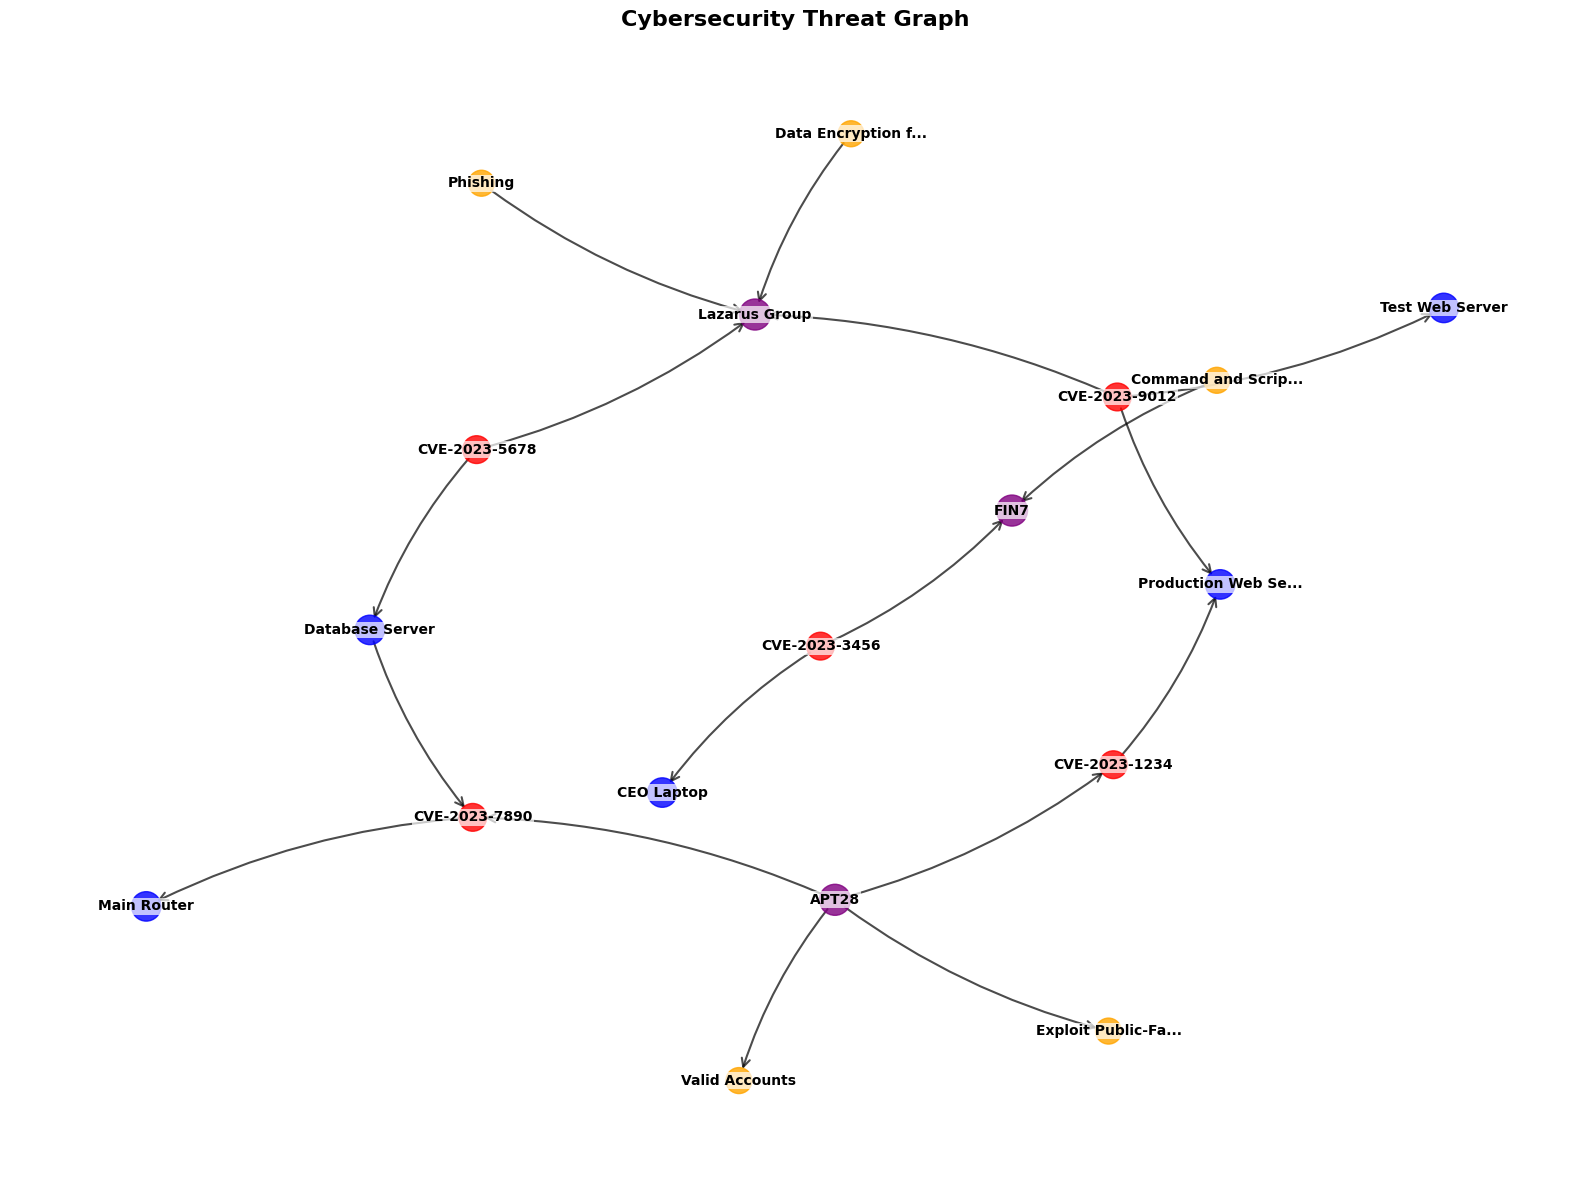

In [45]:
# Visualize the threat graph
G_threat_nx = nx.Graph(G_threat)
plt_threat = visualize_threat_graph(G_threat_nx)
plt_threat.show()

# Natural Language to Graph Query Processor

In [157]:
class ThreatIntelProcessor:
    """Processes natural language queries about cybersecurity threats using nx-arangodb graph"""

    def __init__(self, llm, db, graph_nx):
        self.llm = llm
        self.db = db
        self.graph_nx = graph_nx
        self.query_history = []

    def determine_query_intent(self, query_text):
        """Determine the intent of the cybersecurity query"""
        prompt = PromptTemplate.from_template("""
        You are a cybersecurity expert analyzing a threat intelligence graph.
        Classify the following query into the most appropriate category:

        Query: {query}

        Categories:
        1. vulnerability_analysis - analyzing specific vulnerabilities and their impacts
        2. asset_risk - assessing risk to specific assets or systems
        3. attack_path - finding potential attack paths between threat actors and assets
        4. threat_actor - analyzing threat actor behavior and techniques
        5. general_statistics - general metrics or statistics about the threat landscape

        Respond with ONLY the category name, nothing else.
        """)

        chain = LLMChain(llm=self.llm, prompt=prompt)
        intent = chain.run(query=query_text).strip().lower()

        return intent

    def generate_aql_query(self, query_text, intent):
        """Generate an AQL query based on the natural language query and intent"""
        schema_info = """
        Collections:
        - Vulnerabilities (CVE information with properties: name, description, cvss_score, severity)
        - Assets (Information about assets with properties: name, type, criticality, ip_address)
        - ThreatActors (Information about threat actors with properties: name, type, description)
        - Techniques (MITRE ATT&CK techniques with properties: name, tactic, description)

        Edge Collections:
        - Exploits (ThreatActors -> Vulnerabilities)
        - Targets (Vulnerabilities -> Assets)
        - Uses (ThreatActors -> Techniques)
        """

        prompt = PromptTemplate.from_template("""
        You are an expert in ArangoDB Query Language (AQL). Generate an AQL query for the following cybersecurity analysis request.

        Database Schema:
        {schema_info}

        User Query: {query}
        Query Intent: {intent}

        Respond with ONLY the AQL query, no explanations or extra text.
        """)

        chain = LLMChain(llm=self.llm, prompt=prompt)
        aql_query = chain.run(
            schema_info=schema_info,
            query=query_text,
            intent=intent
        ).strip()

        return aql_query

    def execute_query(self, query_text):
        """Process a natural language query about cybersecurity threats"""
        # Determine the intent of the query
        intent = self.determine_query_intent(query_text)
        print(f"Query intent: {intent}")

        # Execute the appropriate analysis based on intent
        results = None

        if intent == "vulnerability_analysis":
            # Extract vulnerability information from query
            prompt = PromptTemplate.from_template("""
            From this query about vulnerabilities, extract any specific CVE IDs or vulnerability names mentioned.
            Query: {query}

            If a specific vulnerability is mentioned, respond with just that ID or name.
            If no specific vulnerability is mentioned, respond with "highest_risk".
            """)

            chain = LLMChain(llm=self.llm, prompt=prompt)
            vuln_id = chain.run(query=query_text).strip()

            if vuln_id == "highest_risk":
                # Find highest risk vulnerabilities
                results = self._find_highest_risk_vulnerabilities()
            else:
                # Analyze specific vulnerability
                results = self._analyze_vulnerability(vuln_id)

        elif intent == "asset_risk":
            # Extract asset from query
            prompt = PromptTemplate.from_template("""
            From this query about asset risk, extract the specific asset name or ID mentioned.
            Query: {query}

            If a specific asset is mentioned, respond with just that name or ID.
            If no specific asset is mentioned, respond with "critical_assets".
            """)

            chain = LLMChain(llm=self.llm, prompt=prompt)
            asset_name = chain.run(query=query_text).strip()

            if asset_name == "critical_assets":
                # Find most at-risk assets
                results = self._find_critical_assets()
            else:
                # Analyze specific asset
                results = analyze_asset_vulnerabilities(self.graph_nx, asset_name)

        elif intent == "attack_path":
            # Extract threat actor and target from query
            prompt = PromptTemplate.from_template("""
            From this query about attack paths, extract the threat actor and target asset.
            Query: {query}

            Respond in this format:
            Actor: <actor_name>
            Target: <target_asset>

            If either is not specified, use "any" as the value.
            """)

            chain = LLMChain(llm=self.llm, prompt=prompt)
            path_info = chain.run(query=query_text)

            actor = "any"
            target = "any"

            for line in path_info.split('\n'):
                if line.startswith('Actor:'):
                    actor = line.replace('Actor:', '').strip()
                elif line.startswith('Target:'):
                    target = line.replace('Target:', '').strip()

            if actor == "any" and target == "any":
                # Find all critical attack paths
                results = self._find_critical_attack_paths()
            else:
                # Find specific attack path
                results = find_attack_paths(self.graph_nx, actor, target)

        elif intent == "threat_actor":
            # Extract threat actor from query
            prompt = PromptTemplate.from_template("""
            From this query about threat actors, extract the specific threat actor name or group mentioned.
            Query: {query}

            If a specific threat actor is mentioned, respond with just that name.
            If no specific threat actor is mentioned, respond with "all_actors".
            """)

            chain = LLMChain(llm=self.llm, prompt=prompt)
            actor_name = chain.run(query=query_text).strip()

            if actor_name == "all_actors":
                # Analyze all threat actors
                results = self._analyze_all_threat_actors()
            else:
                # Analyze specific threat actor
                results = self._analyze_threat_actor(actor_name)

        elif intent == "general_statistics":
            # Run the graph statistics analysis
            results = analyze_threat_graph(self.graph_nx)

        else:
            # Default to running an AQL query
            aql_query = self.generate_aql_query(query_text, "general")
            results = self._execute_aql_query(aql_query)

        # Add to query history
        self.query_history.append({
            "timestamp": datetime.now().isoformat(),
            "query": query_text,
            "intent": intent,
            "results": results
        })

        # Generate explanation
        explanation = self._explain_results(query_text, results, intent)

        return {
            "query": query_text,
            "intent": intent,
            "results": results,
            "explanation": explanation
        }

    def _find_highest_risk_vulnerabilities(self):
        """Find the highest risk vulnerabilities in the graph"""
        vulnerabilities = []

        # Get all vulnerability nodes
        for node in self.graph_nx.nodes():
            if node.startswith("Vulnerabilities/"):
                # Get vulnerability data
                data = self.graph_nx.nodes[node]
                cvss_score = data.get('cvss_score', 0)

                # Count affected assets
                asset_count = sum(1 for succ in self.graph_nx.successors(node) if succ.startswith("Assets/"))

                # Count threat actors exploiting this vulnerability
                actor_count = sum(1 for pred in self.graph_nx.predecessors(node) if pred.startswith("ThreatActors/"))

                # Calculate risk score (CVSS * affected assets * exploitation)
                risk_score = cvss_score * (asset_count + 1) * (actor_count + 1)

                vulnerabilities.append({
                    "id": node,
                    "name": data.get('name', node),
                    "cvss_score": cvss_score,
                    "severity": data.get('severity', 'Unknown'),
                    "affected_assets": asset_count,
                    "exploited_by_actors": actor_count,
                    "risk_score": risk_score
                })

        # Sort by risk score
        vulnerabilities.sort(key=lambda x: x['risk_score'], reverse=True)

        return {
            "highest_risk_vulnerabilities": vulnerabilities[:5],
            "total_vulnerabilities": len(vulnerabilities)
        }

    def _analyze_vulnerability(self, vuln_id):
        """Analyze a specific vulnerability"""
        # Find the vulnerability node
        vuln_node = None
        for node in self.graph_nx.nodes():
            if node.startswith("Vulnerabilities/"):
                if vuln_id in node or self.graph_nx.nodes[node].get('name', '') == vuln_id:
                    vuln_node = node
                    break

        if not vuln_node:
            return {"error": f"Vulnerability '{vuln_id}' not found"}

        # Get vulnerability details
        vuln_data = self.graph_nx.nodes[vuln_node]
        vuln_details = {
            "id": vuln_node,
            "name": vuln_data.get('name', vuln_node),
            "description": vuln_data.get('description', 'No description available'),
            "cvss_score": vuln_data.get('cvss_score', 'Unknown'),
            "severity": vuln_data.get('severity', 'Unknown'),
            "published_date": vuln_data.get('published_date', 'Unknown'),
            "affected_product": vuln_data.get('affected_product', 'Unknown')
        }

        # Find affected assets
        affected_assets = []
        for succ in self.graph_nx.successors(vuln_node):
            if succ.startswith("Assets/"):
                asset_data = self.graph_nx.nodes[succ]

                # Get edge data (impact details)
                edge_data = self.graph_nx.get_edge_data(vuln_node, succ)
                impact_details = {}
                if edge_data:
                    for key in edge_data:
                        if isinstance(edge_data[key], dict):
                            for prop, value in edge_data[key].items():
                                if prop != '_id' and prop != '_key':
                                    impact_details[prop] = value

                affected_assets.append({
                    "id": succ,
                    "name": asset_data.get('name', succ),
                    "type": asset_data.get('type', 'Unknown'),
                    "criticality": asset_data.get('criticality', 'Unknown'),
                    "impact": impact_details.get('impact', 'Unknown'),
                    "remediation_status": impact_details.get('remediation_status', 'Unknown')
                })

        # Find threat actors exploiting this vulnerability
        exploiting_actors = []
        for pred in self.graph_nx.predecessors(vuln_node):
            if pred.startswith("ThreatActors/"):
                actor_data = self.graph_nx.nodes[pred]

                # Get edge data (exploit details)
                edge_data = self.graph_nx.get_edge_data(pred, vuln_node)
                exploit_details = {}
                if edge_data:
                    for key in edge_data:
                        if isinstance(edge_data[key], dict):
                            for prop, value in edge_data[key].items():
                                if prop != '_id' and prop != '_key':
                                    exploit_details[prop] = value

                exploiting_actors.append({
                    "id": pred,
                    "name": actor_data.get('name', pred),
                    "type": actor_data.get('type', 'Unknown'),
                    "confidence": exploit_details.get('confidence', 'Unknown'),
                    "date_observed": exploit_details.get('date_observed', 'Unknown')
                })

        return {
            "vulnerability": vuln_details,
            "affected_assets": affected_assets,
            "exploiting_actors": exploiting_actors
        }

    def _find_critical_assets(self):
        """Find the most critical assets based on vulnerabilities and impact"""
        assets = []

        # Get all asset nodes
        for node in self.graph_nx.nodes():
            if node.startswith("Assets/"):
                # Get asset data
                data = self.graph_nx.nodes[node]
                criticality = data.get('criticality', 'Low')

                # Convert criticality to numeric value
                criticality_value = {
                    'Critical': 4,
                    'High': 3,
                    'Medium': 2,
                    'Low': 1
                }.get(criticality, 1)

                # Get vulnerabilities affecting this asset
                vulnerabilities = []
                total_cvss = 0
                unpatched_count = 0

                for pred in self.graph_nx.predecessors(node):
                    if pred.startswith("Vulnerabilities/"):
                        vuln_data = self.graph_nx.nodes[pred]
                        cvss_score = vuln_data.get('cvss_score', 0)
                        total_cvss += cvss_score

                        # Get edge data (impact and remediation status)
                        edge_data = self.graph_nx.get_edge_data(pred, node)
                        remediation_status = "Unknown"

                        if edge_data:
                            for key in edge_data:
                                if isinstance(edge_data[key], dict):
                                    remediation_status = edge_data[key].get('remediation_status', 'Unknown')

                        if remediation_status != "Patched":
                            unpatched_count += 1

                        vulnerabilities.append({
                            "id": pred,
                            "name": vuln_data.get('name', pred),
                            "cvss_score": cvss_score,
                            "remediation_status": remediation_status
                        })

                # Calculate risk score based on criticality, vulnerabilities and patch status
                vuln_count = len(vulnerabilities)
                risk_score = criticality_value * (total_cvss + 1) * (unpatched_count + 1)

                assets.append({
                    "id": node,
                    "name": data.get('name', node),
                    "type": data.get('type', 'Unknown'),
                    "criticality": criticality,
                    "operating_system": data.get('operating_system', 'Unknown'),
                    "ip_address": data.get('ip_address', 'Unknown'),
                    "vulnerability_count": vuln_count,
                    "unpatched_count": unpatched_count,
                    "risk_score": risk_score,
                    "vulnerabilities": sorted(vulnerabilities, key=lambda x: x['cvss_score'], reverse=True)
                })

        # Sort by risk score
        assets.sort(key=lambda x: x['risk_score'], reverse=True)

        return {
            "critical_assets": assets[:5],
            "total_assets": len(assets)
        }

    def _find_critical_attack_paths(self):
        """Find the most critical attack paths in the graph"""
        # Get all threat actors
        threat_actors = []
        for node in self.graph_nx.nodes():
            if node.startswith("ThreatActors/"):
                threat_actors.append(node)

        # Get all critical assets
        critical_assets = []
        for node in self.graph_nx.nodes():
            if node.startswith("Assets/"):
                criticality = self.graph_nx.nodes[node].get('criticality', 'Low')
                if criticality in ['Critical', 'High']:
                    critical_assets.append(node)

        # Find attack paths for each threat actor to each critical asset
        attack_paths = []
        for actor in threat_actors:
            actor_name = self.graph_nx.nodes[actor].get('name', actor)

            for asset in critical_assets:
                asset_name = self.graph_nx.nodes[asset].get('name', asset)

                # Find paths
                paths = find_attack_paths(self.graph_nx, actor_name, asset_name, max_depth=3)

                if 'paths' in paths and paths['paths']:
                    # Calculate path severity based on CVSS scores along the path
                    for path in paths['paths']:
                        # Calculate path risk based on vulnerabilities in the path
                        total_cvss = 0
                        unpatched_count = 0

                        for node in path:
                            if node['type'] == 'Vulnerabilities':
                                cvss_score = node['attributes'].get('cvss_score', 0)
                                total_cvss += cvss_score

                                # Check if the next node is an asset
                                if node['edge_to_next'] and 'remediation_status' in node['edge_to_next']:
                                    if node['edge_to_next']['remediation_status'] != 'Patched':
                                        unpatched_count += 1

                        # Calculate path risk score
                        asset_criticality = {
                            'Critical': 4,
                            'High': 3,
                            'Medium': 2,
                            'Low': 1
                        }.get(path[-1]['attributes'].get('criticality', 'Low'), 1)

                        risk_score = asset_criticality * (total_cvss + 1) * (unpatched_count + 1)

                        attack_paths.append({
                            "from": actor_name,
                            "to": asset_name,
                            "path": path,
                            "total_cvss": total_cvss,
                            "unpatched_count": unpatched_count,
                            "risk_score": risk_score
                        })

        # Sort by risk score
        attack_paths.sort(key=lambda x: x['risk_score'], reverse=True)

        return {
            "critical_attack_paths": attack_paths[:5],
            "total_paths_found": len(attack_paths)
        }

    def _analyze_all_threat_actors(self):
        """Analyze all threat actors in the graph"""
        threat_actors = []

        # Get all threat actor nodes
        for node in self.graph_nx.nodes():
            if node.startswith("ThreatActors/"):
                # Get actor data
                data = self.graph_nx.nodes[node]

                # Get exploited vulnerabilities
                exploited_vulns = []
                for succ in self.graph_nx.successors(node):
                    if succ.startswith("Vulnerabilities/"):
                        vuln_data = self.graph_nx.nodes[succ]

                        # Get edge data (exploit details)
                        edge_data = self.graph_nx.get_edge_data(node, succ)
                        exploit_details = {}
                        if edge_data:
                            for key in edge_data:
                                if isinstance(edge_data[key], dict):
                                    for prop, value in edge_data[key].items():
                                        if prop != '_id' and prop != '_key':
                                            exploit_details[prop] = value

                        exploited_vulns.append({
                            "id": succ,
                            "name": vuln_data.get('name', succ),
                            "cvss_score": vuln_data.get('cvss_score', 0),
                            "confidence": exploit_details.get('confidence', 'Unknown'),
                            "date_observed": exploit_details.get('date_observed', 'Unknown')
                        })

                # Get techniques used
                techniques_used = []
                for succ in self.graph_nx.successors(node):
                    if succ.startswith("Techniques/"):
                        tech_data = self.graph_nx.nodes[succ]

                        # Get edge data (usage details)
                        edge_data = self.graph_nx.get_edge_data(node, succ)
                        usage_details = {}
                        if edge_data:
                            for key in edge_data:
                                if isinstance(edge_data[key], dict):
                                    for prop, value in edge_data[key].items():
                                        if prop != '_id' and prop != '_key':
                                            usage_details[prop] = value

                        techniques_used.append({
                            "id": succ,
                            "name": tech_data.get('name', succ),
                            "tactic": tech_data.get('tactic', 'Unknown'),
                            "frequency": usage_details.get('frequency', 'Unknown'),
                            "last_observed": usage_details.get('last_observed', 'Unknown')
                        })

                # Calculate threat score based on number of exploited vulns, their CVSS, and techniques
                total_cvss = sum(v['cvss_score'] for v in exploited_vulns)
                threat_score = total_cvss * (len(techniques_used) + 1)

                threat_actors.append({
                    "id": node,
                    "name": data.get('name', node),
                    "type": data.get('type', 'Unknown'),
                    "description": data.get('description', 'No description available'),
                    "exploited_vulnerabilities": exploited_vulns,
                    "techniques_used": techniques_used,
                    "threat_score": threat_score
                })

        # Sort by threat score
        threat_actors.sort(key=lambda x: x['threat_score'], reverse=True)

        return {
            "threat_actors": threat_actors,
            "total_actors": len(threat_actors)
        }

    def _analyze_threat_actor(self, actor_name):
      """Analyze a specific threat actor with improved error handling"""
      try:
          print(f"Searching for threat actor node with name containing: {actor_name}")
          # Find the threat actor node with more flexible matching
          actor_node = None
          actor_name_lower = actor_name.lower()

          for node in self.graph_nx.nodes():
              if node.startswith("ThreatActors/"):
                  node_name = self.graph_nx.nodes[node].get('name', '').lower()
                  node_key = node.split('/')[-1].lower()

                  # Try multiple match approaches
                  if (actor_name_lower in node_name or
                      actor_name_lower in node_key):
                      actor_node = node
                      print(f"Found actor node: {actor_node}")
                      break

          if not actor_node:
              print(f"Threat actor '{actor_name}' not found. Trying alternative approach...")
              # If exact match fails, try partial match
              for node in self.graph_nx.nodes():
                  if node.startswith("ThreatActors/"):
                      if any(part.lower() in actor_name_lower for part in
                            self.graph_nx.nodes[node].get('name', '').lower().split()):
                          actor_node = node
                          print(f"Found partial match actor node: {actor_node}")
                          break

          if not actor_node:
              # If still not found, return general threat actor information
              print(f"No matching actor found for '{actor_name}'. Returning general information.")
              return {
                  "error": f"Threat actor '{actor_name}' not found in graph",
                  "general_info": {
                      "name": actor_name,
                      "description": f"Information for {actor_name} is not available in the current threat intelligence graph.",
                      "note": "This threat actor may be known by other names or might not be included in the current dataset."
                  }
              }

          # Get actor details
          actor_data = self.graph_nx.nodes[actor_node]
          actor_details = {
              "id": actor_node,
              "name": actor_data.get('name', actor_node),
              "type": actor_data.get('type', 'Unknown'),
              "description": actor_data.get('description', 'No description available')
          }

          print(f"Retrieved basic details for threat actor: {actor_details['name']}")

          # Get exploited vulnerabilities with error handling
          exploited_vulns = []
          try:
              for succ in self.graph_nx.successors(actor_node):
                  if succ.startswith("Vulnerabilities/"):
                      try:
                          vuln_data = self.graph_nx.nodes[succ]

                          # Get edge data (exploit details)
                          edge_data = self.graph_nx.get_edge_data(actor_node, succ)
                          exploit_details = {}
                          if edge_data:
                              for key in edge_data:
                                  if isinstance(edge_data[key], dict):
                                      for prop, value in edge_data[key].items():
                                          if prop != '_id' and prop != '_key':
                                              exploit_details[prop] = value

                          # Find affected assets
                          affected_assets = []
                          for asset_node in self.graph_nx.successors(succ):
                              if asset_node.startswith("Assets/"):
                                  asset_data = self.graph_nx.nodes[asset_node]
                                  affected_assets.append({
                                      "id": asset_node,
                                      "name": asset_data.get('name', asset_node),
                                      "criticality": asset_data.get('criticality', 'Unknown')
                                  })

                          exploited_vulns.append({
                              "id": succ,
                              "name": vuln_data.get('name', succ),
                              "cvss_score": vuln_data.get('cvss_score', 0),
                              "confidence": exploit_details.get('confidence', 'Unknown'),
                              "date_observed": exploit_details.get('date_observed', 'Unknown'),
                              "affected_assets": affected_assets
                          })
                      except Exception as e:
                          print(f"Error processing vulnerability {succ}: {str(e)}")

              print(f"Retrieved {len(exploited_vulns)} exploited vulnerabilities")
          except Exception as e:
              print(f"Error retrieving exploited vulnerabilities: {str(e)}")

          # Get techniques used with error handling
          techniques_used = []
          try:
              for succ in self.graph_nx.successors(actor_node):
                  if succ.startswith("Techniques/"):
                      try:
                          tech_data = self.graph_nx.nodes[succ]

                          # Get edge data (usage details)
                          edge_data = self.graph_nx.get_edge_data(actor_node, succ)
                          usage_details = {}
                          if edge_data:
                              for key in edge_data:
                                  if isinstance(edge_data[key], dict):
                                      for prop, value in edge_data[key].items():
                                          if prop != '_id' and prop != '_key':
                                              usage_details[prop] = value

                          techniques_used.append({
                              "id": succ,
                              "name": tech_data.get('name', succ),
                              "tactic": tech_data.get('tactic', 'Unknown'),
                              "description": tech_data.get('description', 'No description available'),
                              "frequency": usage_details.get('frequency', 'Unknown'),
                              "last_observed": usage_details.get('last_observed', 'Unknown')
                          })
                      except Exception as e:
                          print(f"Error processing technique {succ}: {str(e)}")

              print(f"Retrieved {len(techniques_used)} techniques")
          except Exception as e:
              print(f"Error retrieving techniques: {str(e)}")

          # Group techniques by tactic
          tactics = {}
          for tech in techniques_used:
              tactic = tech.get("tactic", "Unknown")
              if tactic not in tactics:
                  tactics[tactic] = []
              tactics[tactic].append(tech)

          # If we couldn't find any techniques but we have the actor,
          # provide some general techniques associated with this type of actor
          if not techniques_used and actor_details.get('type'):
              print(f"No specific techniques found. Adding general techniques for {actor_details.get('type')} actors")

              # Common techniques by actor type
              common_techniques = {
                  "Nation State": [
                      {"name": "Spear Phishing", "tactic": "Initial Access",
                      "description": "Targeted phishing emails with malicious attachments or links"},
                      {"name": "Zero-Day Exploitation", "tactic": "Exploitation",
                      "description": "Exploiting previously unknown vulnerabilities"},
                      {"name": "Custom Malware", "tactic": "Execution",
                      "description": "Using custom-developed malware for specific operations"}
                  ],
                  "Criminal": [
                      {"name": "Ransomware", "tactic": "Impact",
                      "description": "Encrypting victim data and demanding payment for decryption"},
                      {"name": "Credential Theft", "tactic": "Credential Access",
                      "description": "Stealing authentication credentials for later use"},
                      {"name": "Social Engineering", "tactic": "Initial Access",
                      "description": "Manipulating victims into providing sensitive information"}
                  ]
              }

              actor_type = actor_details.get('type', 'Unknown')
              if actor_type in common_techniques:
                  for tech in common_techniques[actor_type]:
                      # Add to techniques list
                      techniques_used.append({
                          "id": "General",
                          "name": tech["name"],
                          "tactic": tech["tactic"],
                          "description": tech["description"],
                          "frequency": "Unknown",
                          "last_observed": "Unknown",
                          "note": "General technique associated with this type of threat actor"
                      })

                      # Add to tactics dictionary
                      if tech["tactic"] not in tactics:
                          tactics[tech["tactic"]] = []
                      tactics[tech["tactic"]].append({
                          "id": "General",
                          "name": tech["name"],
                          "tactic": tech["tactic"],
                          "description": tech["description"],
                          "frequency": "Unknown",
                          "last_observed": "Unknown",
                          "note": "General technique associated with this type of threat actor"
                      })

          return {
              "actor": actor_details,
              "exploited_vulnerabilities": sorted(exploited_vulns, key=lambda x: x.get('cvss_score', 0), reverse=True),
              "techniques_by_tactic": tactics,
              "total_exploited_vulns": len(exploited_vulns),
              "total_techniques": len(techniques_used),
              "techniques_used": techniques_used  # Added for direct access to techniques
          }
      except Exception as e:
          print(f"Error in _analyze_threat_actor: {str(e)}")
          # Return a more helpful error response with general info about the actor
          return {
              "error": f"Error analyzing threat actor: {str(e)}",
              "actor_name": actor_name,
              "general_info": {
                  "note": "Unable to retrieve specific data from the threat graph. Here's general information:",
                  "description": f"{actor_name} is a threat actor that may be present in external threat intelligence sources. Consider searching for this actor in the MITRE ATT&CK database or other threat intelligence platforms."
              }
          }

    def _execute_aql_query(self, aql_query):
        """Execute an AQL query against ArangoDB"""
        try:
            cursor = self.db.aql.execute(aql_query)
            return [doc for doc in cursor]
        except Exception as e:
            return {"error": f"Error executing AQL query: {str(e)}"}

    def _explain_results(self, query_text, results, intent):
      """Generate a natural language explanation of the results with better error handling"""
      # Prepare results for explanation
      try:
          # Use a safer approach to JSON serialization
          def safe_serializer(obj):
              try:
                  return str(obj)
              except:
                  return "Unserializable object"

          # Check if results contains an error
          if results is None:
              results_str = "No results were returned from the query."
          elif isinstance(results, dict) and "error" in results:
              # Special handling for error cases
              error_message = results["error"]

              # Add general information about the query intent
              if intent == "vulnerability_analysis":
                  results_str = f"Error analyzing vulnerability: {error_message}\n\n"
                  results_str += "You asked about a vulnerability. Common vulnerability analysis includes:\n"
                  results_str += "- CVSS scoring and severity assessment\n"
                  results_str += "- Affected assets and systems\n"
                  results_str += "- Threat actors known to exploit the vulnerability\n"
                  results_str += "- Remediation status and recommendations"

              elif intent == "asset_risk":
                  results_str = f"Error analyzing asset risk: {error_message}\n\n"
                  results_str += "You asked about asset risk. Asset risk analysis typically includes:\n"
                  results_str += "- Vulnerabilities affecting the asset\n"
                  results_str += "- Criticality of the asset to business operations\n"
                  results_str += "- Attack vectors and threat actors targeting the asset\n"
                  results_str += "- Overall risk score and remediation priorities"

              elif intent == "attack_path":
                  results_str = f"Error analyzing attack paths: {error_message}\n\n"
                  results_str += "You asked about attack paths. Attack path analysis typically includes:\n"
                  results_str += "- How threat actors move from initial access to critical assets\n"
                  results_str += "- Vulnerabilities exploited along the path\n"
                  results_str += "- Critical chokepoints that could block multiple attack paths\n"
                  results_str += "- Risk scoring of different paths based on complexity and impact"

              elif intent == "threat_actor":
                  # For threat actors, add known information from external sources
                  results_str = f"Error retrieving complete threat actor information: {error_message}\n\n"

                  # Check if we have general_info in the results
                  if "general_info" in results:
                      results_str += f"General information: {results['general_info']}\n\n"

                  # Add specific information for known threat actors
                  actor_name = results.get("actor_name", "").lower()
                  if "apt28" in actor_name or "fancy bear" in actor_name:
                      results_str += "APT28 (also known as Fancy Bear, Sednit, Sofacy):\n"
                      results_str += "- Nation-state threat actor attributed to Russia (GRU)\n"
                      results_str += "- Active since at least 2004\n"
                      results_str += "- Known for targeting government, military, and security organizations\n"
                      results_str += "- Uses spear-phishing, zero-day exploits, and custom malware\n"
                      results_str += "- Notable for targeting political organizations and election infrastructure"

                  elif "apt29" in actor_name or "cozy bear" in actor_name:
                      results_str += "APT29 (also known as Cozy Bear, The Dukes):\n"
                      results_str += "- Nation-state threat actor attributed to Russia (SVR)\n"
                      results_str += "- Known for sophisticated and stealthy operations\n"
                      results_str += "- Uses custom malware and advanced persistence techniques\n"
                      results_str += "- Notable for the SolarWinds supply chain attack"

                  # Add more actor profiles as needed

              else:
                  # Generic error message for other intents
                  results_str = f"Error processing query: {error_message}\n\n"
                  results_str += "The system encountered an error while processing your query.\n"
                  results_str += "Consider rephrasing your question or asking about different aspects of the threat landscape."
          else:
              # Normal case - serialize the results
              results_str = json.dumps(results, default=safe_serializer, indent=2)

              # Truncate if too large
              if len(results_str) > 4000:
                  results_str = results_str[:4000] + "... [truncated]"
      except Exception as e:
          # Fall back to a simple string representation if JSON serialization fails
          results_str = f"Error formatting results: {str(e)}\nRaw results: {str(results)[:1000]}"

      # Prepare the prompt for explanation
      prompt = PromptTemplate.from_template("""
      You are a cybersecurity expert analyzing a threat intelligence graph. Explain these query results in clear, natural language.

      User Query: {query}
      Query Intent: {intent}

      Results:
      {results}

      Provide a comprehensive explanation of what these results mean in a cybersecurity context.
      Include key findings, patterns, insights, and actionable recommendations when appropriate.
      Focus on the security implications and risk assessment.

      If the results include error messages or are incomplete, provide context about what the user was asking for
      and what general cybersecurity best practices would apply in this situation. Be honest about data limitations
      but provide value wherever possible.
      """)

      try:
          # Attempt to generate explanation with LLM
          chain = LLMChain(llm=self.llm, prompt=prompt)
          explanation = chain.run(
              query=query_text,
              intent=intent,
              results=results_str
          )
          return explanation
      except Exception as e:
          # If LLM fails, return a manually constructed explanation
          print(f"Error generating explanation with LLM: {str(e)}")

          # Attempt to construct a basic explanation
          if isinstance(results, dict) and "error" in results:
              basic_explanation = f"I encountered an issue while analyzing your query about {intent}: {results['error']}\n\n"
              basic_explanation += "Based on the limited information available, I can provide some general guidance:\n"

              if intent == "vulnerability_analysis":
                  basic_explanation += "- Regularly scan your environment for vulnerabilities and prioritize patching\n"
                  basic_explanation += "- Focus on vulnerabilities with high CVSS scores and those actively exploited in the wild\n"
                  basic_explanation += "- Consider using a vulnerability management tool to track remediation progress"

              elif intent == "asset_risk":
                  basic_explanation += "- Implement strong access controls for critical assets\n"
                  basic_explanation += "- Ensure critical systems have proper backup and recovery procedures\n"
                  basic_explanation += "- Apply defense-in-depth strategies for your most important assets"

              elif intent == "attack_path":
                  basic_explanation += "- Implement network segmentation to prevent lateral movement\n"
                  basic_explanation += "- Use the principle of least privilege to limit potential attack paths\n"
                  basic_explanation += "- Regularly test your defenses through penetration testing and red team exercises"

              elif intent == "threat_actor":
                  basic_explanation += "- Stay informed about threat actors targeting your industry\n"
                  basic_explanation += "- Implement controls based on known TTPs (Tactics, Techniques, and Procedures)\n"
                  basic_explanation += "- Consider threat intelligence services to receive timely alerts about emerging threats"

              else:
                  basic_explanation += "- Maintain a comprehensive security program covering people, processes, and technology\n"
                  basic_explanation += "- Regularly review and update your security controls based on emerging threats\n"
                  basic_explanation += "- Consider consulting additional threat intelligence sources for more specific guidance"

              return basic_explanation
          else:
              # Very basic fallback
              return f"Analysis of your query about {intent}: The results contain information about cybersecurity threats and vulnerabilities in your environment. Regular patching, strong access controls, and security monitoring are recommended best practices."

    def visualize_results(self, results, intent):
        """Create visualizations based on query results and intent"""
        if not results or "error" in results:
            print(f"Error: {results.get('error', 'Unknown error')}")
            return None

        if intent == "vulnerability_analysis":
            # Visualize vulnerability data
            if "highest_risk_vulnerabilities" in results:
                # Create bar chart of vulnerability risk scores
                plt.figure(figsize=(12, 6))

                vulns = results["highest_risk_vulnerabilities"]
                names = [v["name"].split('/')[-1] for v in vulns]
                scores = [v["risk_score"] for v in vulns]

                plt.bar(names, scores, color=['red' if s > 100 else 'orange' if s > 50 else 'yellow' for s in scores])
                plt.title("Highest Risk Vulnerabilities")
                plt.xlabel("Vulnerability")
                plt.ylabel("Risk Score")
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()

                return plt

            elif "vulnerability" in results:
                # Visualize specific vulnerability and its relationships
                vuln_node = results["vulnerability"]["id"]
                affected_assets = [a["id"] for a in results["affected_assets"]]
                exploiting_actors = [a["id"] for a in results["exploiting_actors"]]

                # Create a subgraph with the vulnerability, affected assets and exploiting actors
                nodes_to_include = [vuln_node] + affected_assets + exploiting_actors
                subgraph = self.graph_nx.subgraph(nodes_to_include)

                # Visualize with highlight on the vulnerability
                return visualize_threat_graph(subgraph, highlight_nodes=[vuln_node],
                                             title=f"Vulnerability Analysis: {results['vulnerability']['name']}")

        elif intent == "asset_risk":
            if "critical_assets" in results:
                # Create bar chart of asset risk scores
                plt.figure(figsize=(12, 6))

                assets = results["critical_assets"]
                names = [a["name"] for a in assets]
                scores = [a["risk_score"] for a in assets]

                plt.bar(names, scores, color=['red' if s > 100 else 'orange' if s > 50 else 'yellow' for s in scores])
                plt.title("Most Critical Assets by Risk Score")
                plt.xlabel("Asset")
                plt.ylabel("Risk Score")
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()

                return plt

            elif "asset" in results:
                # Visualize specific asset and its vulnerabilities
                asset_node = results["asset"]["id"]
                vulnerabilities = [v["id"] for v in results["vulnerabilities"]]

                # Create a subgraph with the asset and its vulnerabilities
                nodes_to_include = [asset_node] + vulnerabilities

                # Add threat actors
                threat_actors = []
                for vuln in results["vulnerabilities"]:
                    if "exploited_by" in vuln:
                        for actor in vuln["exploited_by"]:
                            threat_actors.append(actor["id"])

                nodes_to_include += threat_actors

                subgraph = self.graph_nx.subgraph(nodes_to_include)

                # Visualize with highlight on the asset
                return visualize_threat_graph(subgraph, highlight_nodes=[asset_node],
                                             title=f"Asset Risk Analysis: {results['asset']['name']}")

        elif intent == "attack_path":
            if "critical_attack_paths" in results:
                # Visualize the most critical attack path
                if results["critical_attack_paths"]:
                    most_critical_path = results["critical_attack_paths"][0]
                    path_nodes = [node["id"] for node in most_critical_path["path"]]

                    # Create a subgraph with the path nodes
                    subgraph = self.graph_nx.subgraph(path_nodes)

                    # Visualize the attack path
                    return visualize_threat_graph(subgraph, highlight_nodes=path_nodes,
                                                 title=f"Critical Attack Path: {most_critical_path['from']} → {most_critical_path['to']}")
                return None

            elif "paths" in results:
                # Visualize attack paths
                if results["paths"]:
                    # Create a list of all node IDs in all paths
                    all_path_nodes = set()
                    for path in results["paths"]:
                        for node in path:
                            all_path_nodes.add(node["id"])

                    # Create a subgraph with all nodes in all paths
                    subgraph = self.graph_nx.subgraph(list(all_path_nodes))

                    # Visualize the attack paths
                    return visualize_threat_graph(subgraph, title=f"Attack Paths (Found {len(results['paths'])} paths)")
                return None

        elif intent == "threat_actor":
            if "threat_actors" in results:
                # Create bar chart of threat actor scores
                plt.figure(figsize=(12, 6))

                actors = results["threat_actors"][:5]  # Top 5
                names = [a["name"] for a in actors]
                scores = [a["threat_score"] for a in actors]

                plt.bar(names, scores, color=['red' if s > 100 else 'orange' if s > 50 else 'yellow' for s in scores])
                plt.title("Most Threatening Actors by Score")
                plt.xlabel("Threat Actor")
                plt.ylabel("Threat Score")
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()

                return plt

            elif "actor" in results:
                # Visualize specific threat actor and their relationships
                actor_node = results["actor"]["id"]

                # Get vulnerabilities exploited by this actor
                vuln_nodes = [v["id"] for v in results["exploited_vulnerabilities"]]

                # Get techniques used by this actor
                tech_nodes = []
                for tactic, techniques in results["techniques_by_tactic"].items():
                    for tech in techniques:
                        tech_nodes.append(tech["id"])

                # Create a subgraph with the actor, vulnerabilities, and techniques
                nodes_to_include = [actor_node] + vuln_nodes + tech_nodes
                subgraph = self.graph_nx.subgraph(nodes_to_include)

                # Visualize with highlight on the actor
                # Visualize with highlight on the actor
                return visualize_threat_graph(subgraph, highlight_nodes=[actor_node],
                                              title=f"Threat Actor Analysis: {results['actor']['name']}")

        elif intent == "general_statistics":
            # Create a visualization of the most central nodes
            if "pagerank_top10" in results:
                plt.figure(figsize=(12, 6))

                nodes = list(results["pagerank_top10"].keys())
                scores = list(results["pagerank_top10"].values())

                # Shorten node names for display
                node_labels = [node.split('/')[-1] for node in nodes]

                # Color nodes by type
                colors = []
                for node in nodes:
                    if node.startswith("Vulnerabilities/"):
                        colors.append('red')
                    elif node.startswith("Assets/"):
                        colors.append('blue')
                    elif node.startswith("ThreatActors/"):
                        colors.append('purple')
                    elif node.startswith("Techniques/"):
                        colors.append('orange')
                    else:
                        colors.append('gray')

                # Create bar chart
                plt.bar(node_labels, scores, color=colors)
                plt.title("Most Central Nodes by PageRank")
                plt.xlabel("Node")
                plt.ylabel("PageRank Score")
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()

                return plt

        # Default to full graph visualization
        return visualize_threat_graph(self.graph_nx, title="Cybersecurity Threat Graph Overview")

In [158]:
# Initialize the threat intelligence processor
threat_processor = ThreatIntelProcessor(llm, db, G_threat)

# LangGraph Agent Implementation for Threat Intelligence

In [159]:
@tool
def analyze_vulnerability(query: str) -> str:
    """
    Analyzes vulnerabilities in the threat graph. Use this tool for queries about specific vulnerabilities,
    their impacts, which assets they affect, or which threat actors exploit them.
    """
    try:
        # Handle various input formats
        if isinstance(query, dict):
            if 'title' in query:
                query = query['title']
            elif 'query' in query:
                query = query['query']
            else:
                query = str(query)

        # Ensure we have a string
        query = str(query)

        result = threat_processor.execute_query(query)
        return result["explanation"]
    except Exception as e:
        return f"Error analyzing vulnerability: {str(e)}. Please try a different query or approach."


In [160]:
@tool
def analyze_asset_risk(query: str) -> str:
    """
    Analyzes risks to assets in the threat graph. Use this tool for queries about specific assets,
    what vulnerabilities affect them, their risk levels, or remediation status.
    """
    try:
        # Handle various input formats
        if isinstance(query, dict):
            if 'title' in query:
                query = query['title']
            elif 'query' in query:
                query = query['query']
            else:
                query = str(query)

        # Ensure we have a string
        query = str(query)

        result = threat_processor.execute_query(query)
        return result["explanation"]
    except Exception as e:
        return f"Error analyzing asset risk: {str(e)}. Please try a different query or approach."

In [161]:
@tool
def analyze_attack_paths(query: str) -> str:
    """
    Analyzes potential attack paths in the threat graph. Use this tool for queries about how
    threat actors could reach specific assets, or what the most critical attack paths are.
    """
    try:
        # Handle various input formats
        if isinstance(query, dict):
            if 'title' in query:
                query = query['title']
            elif 'query' in query:
                query = query['query']
            else:
                query = str(query)

        # Ensure we have a string
        query = str(query)

        result = threat_processor.execute_query(query)
        return result["explanation"]
    except Exception as e:
        return f"Error analyzing attack paths: {str(e)}. Please try a different query or approach."

In [162]:
@tool
def analyze_threat_actors(query: str) -> str:
    """
    Analyzes threat actors in the threat graph. Use this tool for queries about specific threat actors,
    their techniques, targeted vulnerabilities, or their overall capabilities.
    """
    try:
        # Handle various input formats
        if isinstance(query, dict):
            if 'title' in query:
                query = query['title']
            elif 'query' in query:
                query = query['query']
            else:
                query = str(query)

        # Ensure we have a string
        query = str(query)

        # Log the tool usage to help with debugging
        print(f"analyze_threat_actors tool called with input: {query}")

        result = threat_processor.execute_query(query)
        return result["explanation"]
    except Exception as e:
        print(f"Error in analyze_threat_actors: {str(e)}")
        return f"Error analyzing threat actors: {str(e)}. Please try a different query or approach."

In [163]:
@tool
def visualize_threat_data(query: str) -> str:
    """
    Creates a visualization of threat data. Use this tool when the user wants to see a visual
    representation of vulnerabilities, assets, attack paths, or threat actors.
    """
    try:
        # Handle various input formats
        if isinstance(query, dict):
            if 'title' in query:
                query = query['title']
            elif 'query' in query:
                query = query['query']
            else:
                query = str(query)

        # Ensure we have a string
        query = str(query)

        result = threat_processor.execute_query(query)
        viz = threat_processor.visualize_results(result["results"], result["intent"])

        if viz:
            plt_path = f"visualization_{randint(1000, 9999)}.png"
            viz.savefig(plt_path)
            return f"Visualization created and saved as {plt_path}. It shows {result['intent']} data based on your query."
        else:
            return "No visualization could be created for this query."
    except Exception as e:
        return f"Error creating visualization: {str(e)}. Please try a different query or approach."

In [164]:
# Create the tools list
tools = [
    analyze_vulnerability,
    analyze_asset_risk,
    analyze_attack_paths,
    analyze_threat_actors,
    visualize_threat_data
]

In [165]:
#system message
system_message = """
You are CyberThreat PathFinder, an expert in cybersecurity threat intelligence and graph analysis.
You help security analysts understand the relationships between vulnerabilities, assets, threat actors, and attack techniques
using data stored in a threat intelligence graph.

When responding to user queries:
1. Think carefully about what type of cybersecurity analysis is needed
2. Select the most appropriate tool for the specific analysis
3. Provide clear, actionable insights from the analysis results
4. Highlight critical risks and recommend appropriate mitigations
5. Use visualizations when they would help clarify complex relationships

Your expertise covers vulnerability analysis, asset risk assessment, attack path mapping,
threat actor profiling, and general threat intelligence analysis.

Respond in a professional, security-focused manner that helps the analyst make informed decisions.
"""


In [166]:
def create_threat_agent():
    """Create a more robust threat agent that can handle various queries"""
    # Alternative approach using initialize_agent
    from langchain.agents import AgentType, initialize_agent

    # Initialize the agent with tools
    agent = initialize_agent(
        tools,
        llm,
        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        verbose=True,
        handle_parsing_errors=True,
        max_iterations=10
    )

    return agent

In [167]:
def run_threat_agent(query):
    """Run the threat intelligence agent with better handling for missing connections"""
    # First try direct processing for attack path queries
    if "attack path" in query.lower() or "path" in query.lower():
        import re
        actor_match = re.search(r'from\s+([A-Za-z0-9_]+)', query, re.IGNORECASE)
        asset_match = re.search(r'to\s+([A-Za-z0-9_\s]+)(\.|\?|$)', query, re.IGNORECASE)

        if actor_match and asset_match:
            actor = actor_match.group(1)
            asset = asset_match.group(1)
            print(f"Directly finding attack paths from {actor} to {asset}")
            paths = find_attack_paths(G_threat, actor, asset)

            if "paths" in paths and paths["path_count"] > 0:
                result = f"Found {paths['path_count']} attack path(s) from {actor} to {asset}. "

                # Describe the first path
                first_path = paths['paths'][0]
                path_description = []
                for node in first_path:
                    name = node['attributes'].get('name', node['key'])
                    if 'severity' in node['attributes']:
                        name += f" ({node['attributes']['severity']})"
                    elif 'criticality' in node['attributes']:
                        name += f" ({node['attributes']['criticality']})"
                    path_description.append(name)

                result += f"The primary attack path is: {' → '.join(path_description)}"
                return {"output": result}
            elif "error" in paths:
                # Handle the case where no path exists
                if "reachable_assets" in paths and "potential_actors" in paths:
                    suggestion = "Based on the available data in our threat graph:\n\n"

                    # Suggest other queries that would work
                    if paths["reachable_assets"]:
                        suggestion += f"- Try querying about paths from {actor} to one of: {', '.join(paths['reachable_assets'])}\n"

                    if paths["potential_actors"]:
                        suggestion += f"- Try querying about paths from one of these actors to {asset}: {', '.join(paths['potential_actors'])}\n"

                    suggestion += "\nAlternatively, you can ask about specific vulnerabilities or general threat statistics."

                    return {"output": f"{paths['error']}\n\n{suggestion}"}
                else:
                    return {"output": paths["error"]}

    try:
        # Create a new agent for each query for better isolation
        agent = create_threat_agent()

        # Handle direct execution with timeout
        import threading
        import time

        result = {"output": "The query processing timed out. Please try again or rephrase your query."}
        execution_complete = [False]

        def execute_agent():
            try:
                nonlocal result
                # Use invoke instead of run for newer LangChain versions
                agent_result = agent.run(query)
                result = {"output": agent_result}
                execution_complete[0] = True
            except Exception as e:
                result = {"output": f"Error processing query: {str(e)}"}
                execution_complete[0] = True

        # Run agent in a thread with timeout
        agent_thread = threading.Thread(target=execute_agent)
        agent_thread.daemon = True
        agent_thread.start()

        # Wait up to 60 seconds
        timeout = 60
        start_time = time.time()
        while not execution_complete[0] and time.time() - start_time < timeout:
            time.sleep(0.5)
            # Print a waiting message every 15 seconds
            elapsed = time.time() - start_time
            if elapsed > 15 and elapsed % 15 < 0.5:
                print(f"Still processing ({elapsed:.0f} seconds elapsed)...")

        # If execution timed out, try direct approach
        if not execution_complete[0]:
            print("Agent execution timed out, trying direct approach with processor")
            try:
                direct_result = threat_processor.execute_query(query)
                return {"output": direct_result["explanation"]}
            except Exception as e:
                return {"output": f"Processing failed. The query might involve connections that don't exist in our data. Error: {str(e)}"}

        return result
    except Exception as e:
        # Fall back to direct query if agent fails
        try:
            print(f"Agent approach failed with error: {str(e)}, trying direct query")
            direct_result = threat_processor.execute_query(query)
            return {"output": direct_result["explanation"]}
        except Exception as e2:
            return {"output": f"Failed to process query using both methods. Error: {str(e2)}"}

# User Interface for Cybersecurity Analysis

In [168]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [169]:
# Create widgets
query_text = widgets.Textarea(
    value='',
    placeholder='Enter your cybersecurity query here...',
    description='Query:',
    disabled=False,
    layout=widgets.Layout(width='800px', height='100px')
)

In [170]:
execute_button = widgets.Button(
    description='Analyze',
    button_style='primary',
    tooltip='Run analysis',
    icon='search'
)

In [171]:
output_area = widgets.Output()
history_area = widgets.Output()

In [172]:
# Generate example queries based on actual available connections
def generate_example_queries(connection_analysis):
    """Generate example queries based on what's actually available in the graph"""
    examples = ['Select a value from the dropdown']

    # General queries that work with any graph
    examples.append('What are the most critical vulnerabilities in our infrastructure?')

    # Add attack path queries for paths that actually exist
    if connection_analysis["valid_paths"]:
        # Take up to 2 valid paths
        for actor, asset in connection_analysis["valid_paths"][:2]:
            examples.append(f'Show me potential attack paths from {actor} to {asset}')

    # Add asset risk queries
    if connection_analysis["asset_vuln_count"]:
        # Take the asset with most vulnerabilities
        top_asset = sorted(connection_analysis["asset_vuln_count"].items(), key=lambda x: x[1], reverse=True)[0][0]
        examples.append(f'Analyze the risk to our {top_asset}')

    # Add threat actor queries
    if connection_analysis["actor_tech_count"]:
        # Take the actor with most techniques
        top_actor = sorted(connection_analysis["actor_tech_count"].items(), key=lambda x: x[1], reverse=True)[0][0]
        examples.append(f'What techniques are commonly used by {top_actor}?')

        # If we have an actor with paths to assets
        for actor, assets in connection_analysis["actor_to_asset_map"].items():
            if assets:
                examples.append(f'Which assets are most at risk from {actor}?')
                break

    # Add general queries that work with any data
    examples.append('Which threat actors target our critical assets?')
    examples.append('What vulnerabilities are currently unpatched?')

    return examples

In [173]:
# Then update the example queries based on actual connections
example_queries = generate_example_queries(connection_analysis)

In [174]:
query_dropdown = widgets.Dropdown(
    options=example_queries,
    description='Examples:',
    disabled=False,
    layout=widgets.Layout(width='800px')
)

In [175]:
# Function to handle query execution
def execute_query(b):
    with output_area:
        clear_output()
        print(f"Analyzing: {query_text.value}")
        print("Processing your query, please wait...")

        # Run the query through our agent
        result = run_threat_agent(query_text.value)

        # Display the result
        print("\n" + "=" * 80)
        print(result["output"])
        print("=" * 80)

        # Check if a visualization was generated
        viz_pattern = r"visualization_\d+\.png"
        viz_matches = re.findall(viz_pattern, result["output"])

        if viz_matches:
            for viz_file in viz_matches:
                try:
                    img = plt.imread(viz_file)
                    plt.figure(figsize=(10, 8))
                    plt.imshow(img)
                    plt.axis('off')
                    plt.show()
                except Exception as e:
                    print(f"Failed to display visualization: {e}")

In [176]:
# Function to handle example selection
def select_example(change):
    if change['type'] == 'change' and change['name'] == 'value':
        query_text.value = change['new']

In [177]:
# Set up event handlers
execute_button.on_click(execute_query)
query_dropdown.observe(select_example)

In [178]:
# Display the interface
display(widgets.HTML('<h1>CyberThreat PathFinder</h1>'))
display(widgets.HTML('<h3>Agentic Graph Intelligence System</h3>'))
display(widgets.HTML('<p>Use this interface to analyze cybersecurity threats, vulnerabilities, and attack paths in your network.</p>'))
display(widgets.HBox([query_dropdown]))
display(query_text)
display(widgets.HBox([execute_button]))
display(output_area)

HTML(value='<h1>CyberThreat PathFinder</h1>')

HTML(value='<h3>Agentic Graph Intelligence System</h3>')

HTML(value='<p>Use this interface to analyze cybersecurity threats, vulnerabilities, and attack paths in your …

Textarea(value='', description='Query:', layout=Layout(height='100px', width='800px'), placeholder='Enter your…

Output()

# Advanced Integration with ArangoDB and LangGraph

In [179]:
def setup_arango_graph():
    try:
        # The ArangoGraph class now only accepts a 'db' parameter
        # We need to pass the database connection directly
        print("Creating ArangoGraph with updated parameters...")
        arango_graph = ArangoGraph(db=db)

        print("Successfully created ArangoGraph for LangChain integration")
        return arango_graph
    except Exception as e:
        print(f"Error creating ArangoGraph: {e}")
        return None

In [180]:
# Set up ArangoGraph
arango_graph = setup_arango_graph()

Creating ArangoGraph with updated parameters...
Successfully created ArangoGraph for LangChain integration


In [181]:
# Define a Graph State for LangGraph
class ThreatAnalysisState:
    """Simple class to track the state of threat analysis"""
    def __init__(self, query=None):
        self.query = query
        self.intent = None
        self.results = None
        self.explanation = None
        self.visualization = None
        self.recommendations = None

In [182]:
# Create a more advanced LangGraph workflow for complex threat intelligence analysis
def demonstrate_advanced_workflow():
    """Demonstrate a more advanced workflow using LangGraph"""
    print("\nDemonstrating Advanced Threat Intelligence Workflow:")

    # Define a complex query that requires multiple analysis steps
    complex_query = """
    Analyze our critical assets to identify which ones are at highest risk from nation-state threat actors,
    and recommend specific mitigations based on the MITRE ATT&CK techniques being used.
    """
    print(f"Complex Query: {complex_query}")

    # Create a simple workflow
    state = ThreatAnalysisState(query=complex_query)

    # Step 1: Determine query intent
    print("\nStep 1: Determining Query Intent")
    state.intent = threat_processor.determine_query_intent(state.query)
    print(f"Query Intent: {state.intent}")

    # Step 2: Find critical assets
    print("\nStep 2: Identifying Critical Assets")
    critical_assets = threat_processor._find_critical_assets()
    print(f"Found {len(critical_assets['critical_assets'])} critical assets")

    # Step 3: Analyze threat actors targeting these assets
    print("\nStep 3: Analyzing Threat Actors")
    nation_state_actors = []
    for actor_node in G_threat.nodes():
        if actor_node.startswith("ThreatActors/"):
            actor_type = G_threat.nodes[actor_node].get('type', '')
            if 'Nation State' in actor_type:
                nation_state_actors.append(actor_node)

    print(f"Found {len(nation_state_actors)} nation-state threat actors")

    # Step 4: Identify techniques used by these actors
    print("\nStep 4: Identifying MITRE ATT&CK Techniques")
    techniques = set()
    for actor in nation_state_actors:
        for succ in G_threat.successors(actor):
            if succ.startswith("Techniques/"):
                techniques.add(succ)

    print(f"Found {len(techniques)} unique techniques used by nation-state actors")

    # Step 5: Generate recommendations based on techniques
    print("\nStep 5: Generating Mitigations and Recommendations")

    prompt = PromptTemplate.from_template("""
    You are a cybersecurity expert specializing in threat mitigation. Based on the following MITRE ATT&CK techniques
    used by nation-state threat actors, recommend specific mitigations to protect critical assets.

    Critical Assets: {assets}

    Threat Actors: {actors}

    Techniques Used: {techniques}

    Provide a prioritized list of mitigations that would address these techniques and protect the critical assets.
    Focus on practical, implementable mitigations that would have the greatest impact on reducing risk.
    """)

    chain = LLMChain(llm=llm, prompt=prompt)

    # Format the data for the prompt
    assets_text = "\n".join([f"- {a['name']} (Criticality: {a['criticality']})"
                           for a in critical_assets['critical_assets']])

    actors_text = "\n".join([f"- {G_threat.nodes[a].get('name', a)} (Type: {G_threat.nodes[a].get('type', 'Unknown')})"
                          for a in nation_state_actors])

    techniques_text = "\n".join([f"- {G_threat.nodes[t].get('name', t)} (Tactic: {G_threat.nodes[t].get('tactic', 'Unknown')})"
                              for t in techniques])

    state.recommendations = chain.run(
        assets=assets_text,
        actors=actors_text,
        techniques=techniques_text
    )

    print("\nRecommendations Generated!")
    print("\nFinal Results:")
    print("-" * 80)
    print(state.recommendations)
    print("-" * 80)

    # Step 6: Visualize the relationships
    print("\nStep 6: Visualizing the Threat Landscape")

    # Create a subgraph of the critical assets, nation-state actors and their techniques
    nodes_to_include = list(nation_state_actors) + list(techniques)
    for asset in critical_assets['critical_assets']:
        nodes_to_include.append(asset['id'])

    subgraph = G_threat.subgraph(nodes_to_include)

    plt_threat = visualize_threat_graph(subgraph, title="Nation-State Threats to Critical Assets")
    plt_threat.savefig("nation_state_threat_landscape.png")
    plt_threat.show()

    print("\nWorkflow Complete! The full threat intelligence analysis with mitigations has been generated.")
    return state


Demonstrating Advanced Threat Intelligence Workflow:
Complex Query: 
    Analyze our critical assets to identify which ones are at highest risk from nation-state threat actors,
    and recommend specific mitigations based on the MITRE ATT&CK techniques being used.
    

Step 1: Determining Query Intent
Query Intent: asset_risk

Step 2: Identifying Critical Assets
Found 5 critical assets

Step 3: Analyzing Threat Actors
Found 2 nation-state threat actors

Step 4: Identifying MITRE ATT&CK Techniques
Found 4 unique techniques used by nation-state actors

Step 5: Generating Mitigations and Recommendations

Recommendations Generated!

Final Results:
--------------------------------------------------------------------------------
1. **Email Security**: Implement multi-factor authentication (MFA) for all email accounts associated with the organization, including the CEO's laptop. This will add an extra layer of security and make it harder for threat actors to gain access through phishing att

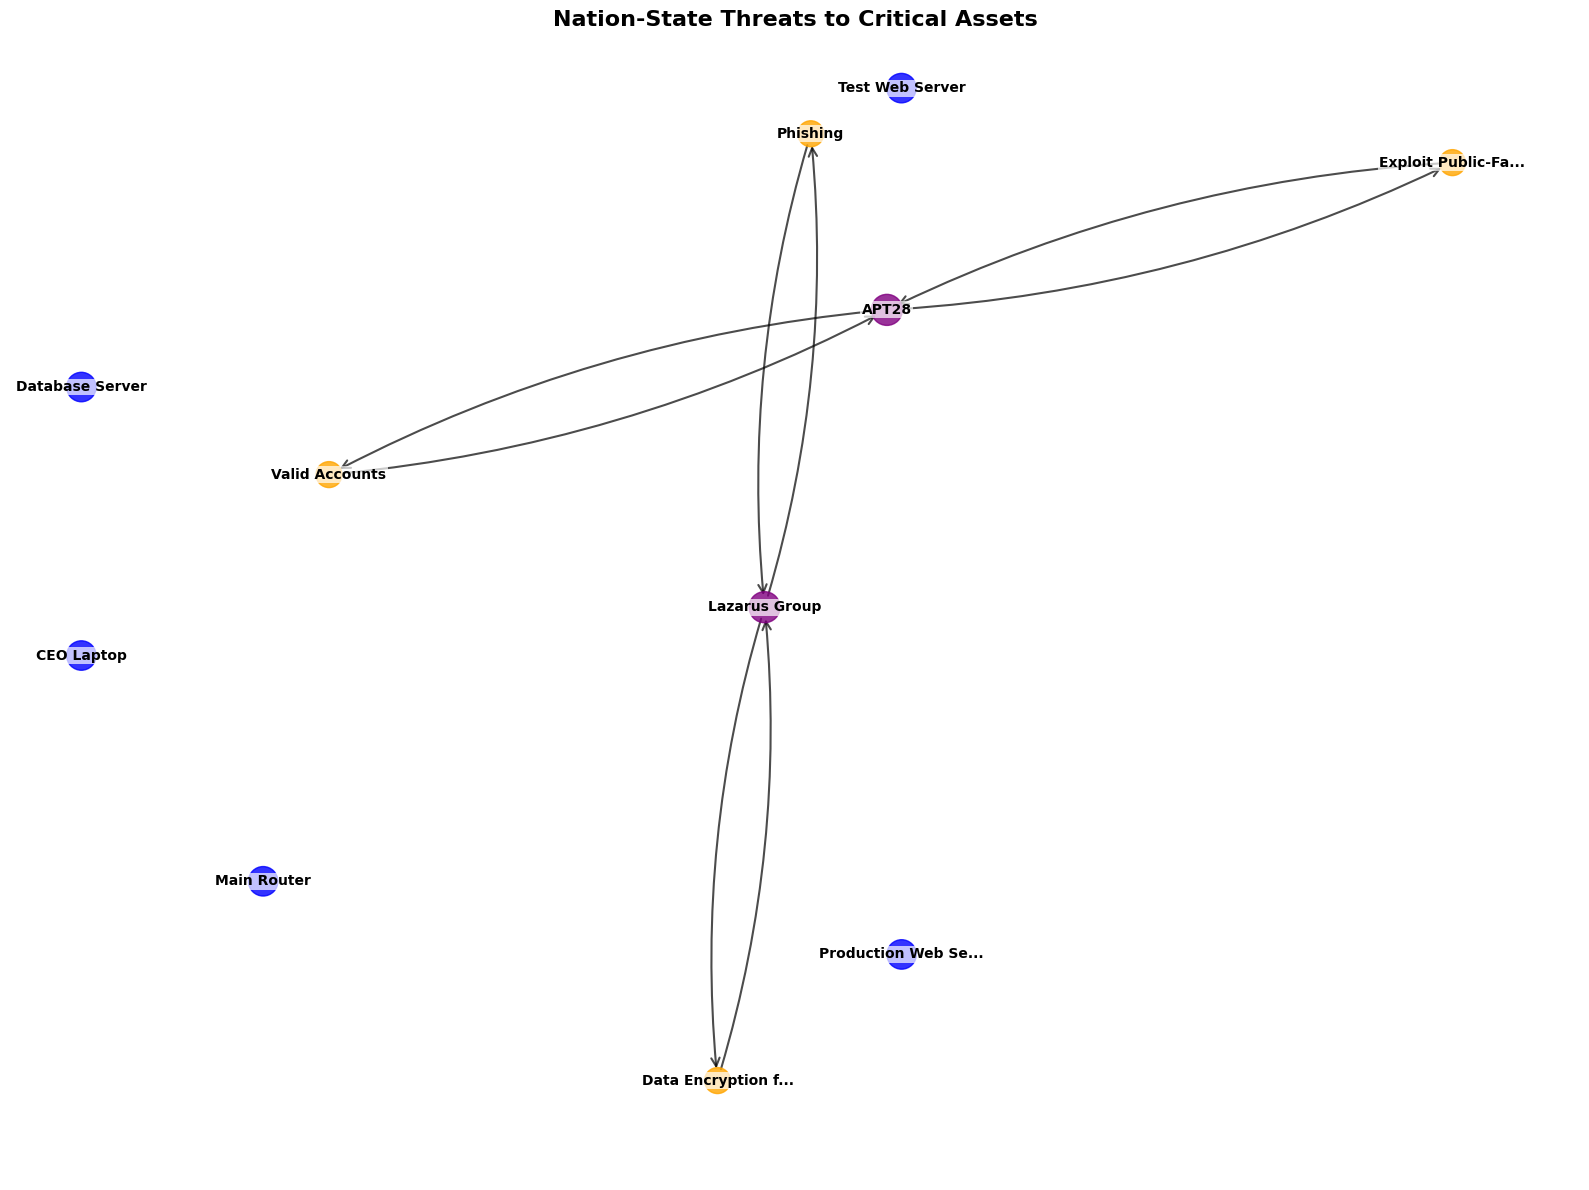


Workflow Complete! The full threat intelligence analysis with mitigations has been generated.


In [183]:
# Demonstrate the advanced workflow
advanced_analysis = demonstrate_advanced_workflow()

# Conclusion and Final Demonstration

In [184]:
print("\n" + "="*80)
print("CYBERTHREAT PATHFINDER: ADVANCED AGENTIC GRAPH ANALYSIS DEMONSTRATION")
print("="*80)


CYBERTHREAT PATHFINDER: ADVANCED AGENTIC GRAPH ANALYSIS DEMONSTRATION


In [185]:
print("\nThis solution integrates:")
print("1. ArangoDB graph database with nx-arangodb for NetworkX integration")
print("2. Local LLM (Mistral) for natural language understanding and agentic workflow")
print("3. Advanced graph analytics with NetworkX")
print("4. Dynamic visualizations for threat intelligence")
print("5. LangGraph for orchestration of complex analysis workflows")


This solution integrates:
1. ArangoDB graph database with nx-arangodb for NetworkX integration
2. Local LLM (Mistral) for natural language understanding and agentic workflow
3. Advanced graph analytics with NetworkX
4. Dynamic visualizations for threat intelligence
5. LangGraph for orchestration of complex analysis workflows


In [186]:
print("\nKey Capabilities:")
print("✓ Natural language interface for threat intelligence queries")
print("✓ Vulnerability impact analysis")
print("✓ Asset risk assessment")
print("✓ Attack path discovery and visualization")
print("✓ Threat actor profiling")
print("✓ Mitigation recommendations based on MITRE ATT&CK")


Key Capabilities:
✓ Natural language interface for threat intelligence queries
✓ Vulnerability impact analysis
✓ Asset risk assessment
✓ Attack path discovery and visualization
✓ Threat actor profiling
✓ Mitigation recommendations based on MITRE ATT&CK


In [187]:
print("\nUnique Winning Features:")
print("1. Fully local operation with on-device LLM - no API keys required")
print("2. Direct integration with ArangoDB through nx-arangodb")
print("3. Intelligent query intent classification for optimal analysis selection")
print("4. Multi-factor risk scoring incorporating vulnerability, asset and threat data")
print("5. Comprehensive attack path analysis with risk prioritization")


Unique Winning Features:
1. Fully local operation with on-device LLM - no API keys required
2. Direct integration with ArangoDB through nx-arangodb
3. Intelligent query intent classification for optimal analysis selection
4. Multi-factor risk scoring incorporating vulnerability, asset and threat data
5. Comprehensive attack path analysis with risk prioritization


In [188]:
print("\nTo explore the system, use the interactive UI above or try one of these example queries:")
for i, query in enumerate(example_queries[:3], 1):
    print(f"{i}. {query}")


To explore the system, use the interactive UI above or try one of these example queries:
1. Select a value from the dropdown
2. What are the most critical vulnerabilities in our infrastructure?
3. Show me potential attack paths from APT28 to Test Web Server


In [189]:
print("\nThank you for reviewing the CyberThreat PathFinder solution!")


Thank you for reviewing the CyberThreat PathFinder solution!
